In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
import copy
import pyfonts

In [6]:
import matplotlib.font_manager
font_names = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
# Print unique sorted names to find the exact name of the font you want to use
print(sorted(set(font_names)))
font = pyfonts.load_google_font("Average Sans")

['Agency FB', 'Algerian', 'Arial', 'Arial Rounded MT Bold', 'Bahnschrift', 'Baskerville Old Face', 'Bauhaus 93', 'Bell MT', 'Berlin Sans FB', 'Berlin Sans FB Demi', 'Bernard MT Condensed', 'Blackadder ITC', 'Bodoni MT', 'Book Antiqua', 'Bookman Old Style', 'Bookshelf Symbol 7', 'Bradley Hand ITC', 'Britannic Bold', 'Broadway', 'Brush Script MT', 'Calibri', 'Californian FB', 'Calisto MT', 'Cambria', 'Candara', 'Castellar', 'Centaur', 'Century', 'Century Gothic', 'Century Schoolbook', 'Chiller', 'Colonna MT', 'Comic Sans MS', 'Consolas', 'Constantia', 'Cooper Black', 'Copperplate Gothic Bold', 'Copperplate Gothic Light', 'Corbel', 'Courier New', 'Curlz MT', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Dubai', 'Ebrima', 'Edwardian Script ITC', 'Elephant', 'Engravers MT', 'Eras Bold ITC', 'Eras Demi ITC', 'Eras Light ITC', 'Eras Medium ITC', 'Felix Titling', 'Font Awesome 5 Brands', 'Font Awesome 5 Free Regular', 'Font Awesome 5 Free So

In [8]:
#Set global plotting parameters
mpl.rcParams['agg.path.chunksize'] = 10000
mpl.rcParams['figure.dpi'] = 600

font = pyfonts.load_google_font("Average Sans")
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ['Liberation Sans']#, "DejaVu Sans", "Liberation Sans", "Verdana", "Arial", "Helvetica", "sans-serif"]
SIZE_DEFAULT = 10
plt.rcParams["font.size"] = SIZE_DEFAULT
plt.rcParams["axes.titlesize"] = SIZE_DEFAULT + 6
plt.rcParams["axes.labelsize"] = SIZE_DEFAULT + 4
plt.rcParams["xtick.labelsize"] = SIZE_DEFAULT
plt.rcParams["ytick.labelsize"] = SIZE_DEFAULT

fig_width = 6  # inches
fig_height = 5.5  # inches
plt.rcParams["figure.figsize"] = (fig_width, fig_height)


In [9]:
#import dataframes from CSV files
folder_path = r"C:\Users\bensi\Documents\20250925"
csv_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.csv')]
os.chdir(r"C:\Users\bensi\Dropbox\Thesis figures")
dataframes = {}
df_names = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    if "2025" in file:
        df = pd.read_csv(file_path, skiprows=8, header=None, names=["frequency", "Amplitude", "Phase"])
        # Use file name without extension as the key
        df_name = os.path.splitext(file)[0]
        df_name = df_name.split('_2025')[0]
        df_names.append(df_name)
        dataframes[df_name] = df
    else:
        df = pd.read_csv(file_path, skiprows=1, header=None, names=["frequency", "Amplitude", "Phase"])
        # Use file name without extension as the key
        df_name = os.path.splitext(file)[0]
        df_names.append(df_name)
        dataframes[df_name] = df

print(df_names)

#separate dataframes into subgroups
#always in order of 1 beam then 10 beams

df_ref = {}
df_ref['1 Channel NOCICpass'] = dataframes['1beam_NOCICpass']
df_ref['10 Channel NOCICpass'] = dataframes['10beam_NOCICpass']

norm1beam = dataframes['1beam_NOCICpass'].copy()
norm1beam["Amplitude"] = norm1beam["Amplitude"] - norm1beam["Amplitude"].values[0]  # Adjust 1-beam normalized data
norm10beam = dataframes['10beam_NOCICpass'].copy()
norm10beam["Amplitude"] = norm10beam["Amplitude"] - norm10beam["Amplitude"].values[0]  # Adjust 10-beam normalized data

df_pass = {}
df_pass['1 Channel'] = norm1beam
df_pass['10 Channel'] = norm10beam

df_CIC = {}
df_CIC['1 Channel CIC'] = dataframes['1beam_passthrough']
df_CIC['10 Channel CIC'] = dataframes['10beam_passthrough']

df_prop = {}
df_prop['1 Channel'] = dataframes['1beam_proportional']
df_prop['10 Channel'] = dataframes['10beam_proportional']

dataframes['1beam_CDIFderivative']["Amplitude"] = dataframes['1beam_CDIFderivative']["Amplitude"] - 6
dataframes['10beam_CDIFderivative']["Amplitude"] = dataframes['10beam_CDIFderivative']["Amplitude"] - 6
df_derivs = {}
df_derivs['1 Channel First Diff.'] = dataframes['1beam_derivative']
df_derivs['10 Channel First Diff.'] = dataframes['10beam_derivative']
df_derivs['1 Channel Central Diff.'] = dataframes['1beam_CDIFderivative']
df_derivs['10 Channel Central Diff.'] = dataframes['10beam_CDIFderivative']

df_bandpass = {}
df_bandpass['1 Channel Butterworth'] = dataframes['1beam_butter_60-600bandpass_o4']
df_bandpass['1 Channel Chebyshev 1'] = dataframes['1beam_cheby1_60-600bandpass_o4']
df_bandpass['1 Channel Elliptic'] = dataframes['1beam_ellip_60-600bandpass_o4']

df_beambandpass = {}
df_beambandpass['1 Channel'] = dataframes['1beam_butter_60-600bandpass_o4']
df_beambandpass['10 Channel'] = dataframes['10beam_butter_60-600bandpass_o4']

df_ideal_bandpass = {}
df_ideal_bandpass['Butterworth'] = dataframes['butter_band']
df_ideal_bandpass['Chebyshev 1'] = dataframes['cheby1_band']
df_ideal_bandpass['Elliptic'] = dataframes['ellip_band']

df_quant_bandpass = {}
df_quant_bandpass['Quantized Butterworth'] = dataframes['Quantized_butter_band']
df_quant_bandpass['Quantized Chebyshev 1'] = dataframes['Quantized_cheby1_band']
df_quant_bandpass['Quantized Elliptic'] = dataframes['Quantized_ellip_band']

df_ideal_butter = {}
df_ideal_butter['Butterworth'] = dataframes['butter_band']


['10beam_butter_60-600bandpass_o4', '10beam_butter_60highpass_o4', '10beam_CDIFderivative', '10beam_derivative', '10beam_NOCICpass', '10beam_passthrough', '10beam_proportional', '1beam_butter_200Hz_o2', '1beam_butter_60-600bandpass_o4', '1beam_CDIFderivative', '1beam_cheby1_200Hz_o2', '1beam_cheby1_200Hz_o4', '1beam_cheby1_60-600bandpass_o4', '1beam_cheby2_60-600bandpass_o4', '1beam_derivative', '1beam_ellip_60-600bandpass_o4', '1beam_NOCICpass', '1beam_passthrough', '1beam_proportional', 'butter_band', 'cheby1_band', 'ellip_band', 'Quantized_butter_band', 'Quantized_cheby1_band', 'Quantized_ellip_band']


In [10]:
#Generate ideal responses of CIC, ZOH and differentiators

#Import frequencies to evaluate at
w = dataframes['10beam_passthrough']['frequency'].values

fs = 100000000 # 100 MHz sampling frequency
decimation_factor = 25000
fs_new = fs / decimation_factor
f_nyquist_new = fs_new / 2

#CIC filter for 10 beams 25 us - 15us - 30  window
len_CIC_10 = 970
b_cic_10 = np.ones(len_CIC_10) / len_CIC_10
a = [1]
system_CIC_10 = signal.TransferFunction(b_cic_10, a)
__, h_cic_10 = signal.freqz(b_cic_10, a, fs=fs, worN=w)
CIC_10_dB = 20 * np.log10(np.abs(h_cic_10))
CIC_10_deg = np.angle(h_cic_10, deg=True)

#CIC filter for 1 beam 250us - 15us - 30 edge window
len_CIC_1 = (250-15)*100 - 30
b_cic_1 = np.ones(len_CIC_1) / len_CIC_1
a = [1]
system_CIC_1 = signal.TransferFunction(b_cic_1, a)
__, h_cic_1 = signal.freqz(b_cic_1, a, fs=fs, worN=w)
CIC_1_dB = 20 * np.log10(np.abs(h_cic_1))
CIC_1_deg = np.angle(h_cic_1, deg=True)

#Zero Order Hold (ZOH) response from interpolation
h_zoh = 2*np.sin(w*np.pi*decimation_factor/fs)/(w*2*np.pi*decimation_factor/fs)
zoh_dB = 20 * np.log10(np.abs(h_zoh) + 1e-10)
zoh_deg = -decimation_factor/(2*fs) * w * 360

# Design first difference differentiator: y[n] = x[n] - x[n-1]
b_first = [1, -1]
a_first = [1]
__, h_firstd = signal.freqz(b_first, a_first, fs=fs_new, worN=w)
firstd_db = 20 * np.log10(np.abs(h_firstd) + 1e-10)
firstd_deg = np.angle(h_firstd, deg=True)

# Design central difference differentiator: y[n] = (x[n] - x[n-2]) / 2
b_central = [1, 0, -1]
a_central = [2]
__, h_centrald = signal.freqz(b_central, a_central, fs=fs_new, worN=w)
centrald_db = 20 * np.log10(np.abs(h_centrald) + 1e-10)
centrald_deg = np.angle(h_centrald, deg=True)

# create dictionaries of ideal responses

ideal_CIC_responses = {
    '1 Channel CIC': pd.DataFrame({'frequency': w, 'Amplitude': CIC_1_dB, 'Phase': CIC_1_deg}),
    '10 Channel CIC': pd.DataFrame({'frequency': w, 'Amplitude': CIC_10_dB, 'Phase': CIC_10_deg})
}

ideal_NOPASS_responses = {
    'ZOH Interp.': pd.DataFrame({'frequency': w, 'Amplitude': zoh_dB, 'Phase': zoh_deg})
}

ideal_deriv_responses = {
    'First diff.': pd.DataFrame({'frequency': w, 'Amplitude': firstd_db, 'Phase': firstd_deg}),
    'Central diff.': pd.DataFrame({'frequency': w, 'Amplitude': centrald_db, 'Phase': centrald_deg})
}

In [11]:
#correct for response
def cic_response_subtraction(dfdict, refdict):
    normdict = copy.deepcopy(dfdict)
    for key in dfdict:
        if '10 Channel' in key:
            keyr = [k for k in refdict.keys() if '10 Channel' in k][0]
        else:
            keyr = [k for k in refdict.keys() if '1 Channel' in k][0]
            
        normdict[key]["Amplitude"] = dfdict[key]["Amplitude"] - refdict[keyr]["Amplitude"]
        normdict[key]["Phase"] = dfdict[key]["Phase"] - refdict[keyr]["Phase"]
        
    return normdict

def phase_wrap(intphase):
    phase = intphase
    phase = np.where(phase > 180, phase - 360, phase)
    phase = np.where(phase < -180, phase + 360, phase)
    return phase
    

def plot_bode_comparison(df_dict, w, ideal_responses, title_suffix=""):
    #colors for data
    dcol = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
    #colors for theory
    tcol = ['#02311C', '#42213B', '#11204C', '#000000']

    # Magnitude figure with residuals subplot
    fig1, (ax1, ax_res) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[3,1]})
    ax1.set_xlim(left=0, right=w[-100])
    ax_res.set_xlim(left=0, right=w[-100])
    mins = []
    maxs = []
    i=0
    for key in df_dict:
        mins.append(np.min(df_dict[key]['Amplitude'].values[:-100]))
        maxs.append(np.max(df_dict[key]['Amplitude'].values[:-100]))
        ax1.plot(df_dict[key]['frequency'], df_dict[key]['Amplitude'],'.', alpha=0.6, label=key)
        i+=1
    i=0
    for key in ideal_responses:
        ax1.plot(w, ideal_responses[key]['Amplitude'], '--', color=tcol[i], label=f'Ideal {key}')
        i+=1
    ax1.set_title(f'Bode Magnitude Comparison\n {title_suffix}')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.grid(which='both', linestyle='--', linewidth=0.5)
    ax1.legend()
    ax1.set_ylim(bottom=min(mins)-1, top=max(maxs)+1)

    # Residuals: pick matching ideal by substring if possible, otherwise use first ideal
    first_ideal_key = next(iter(ideal_responses))
    mins = []
    maxs = []
    for key in df_dict:
        # find ideal whose label appears in the dataframe name (case-insensitive)
        match_key = next((k for k in ideal_responses.keys() if k.lower() in key.lower()), first_ideal_key)
        ideal_mag = ideal_responses[match_key]['Amplitude']
        residual = df_dict[key]['Amplitude'].values - ideal_mag
        mins.append(np.min(residual[:-100]))
        maxs.append(np.max(residual[:-100]))
        ax_res.plot(df_dict[key]['frequency'], residual, '.', label=key, alpha=0.6, markersize=3)
    ax_res.axhline(0, color='k', linestyle='--', linewidth=0.8)
    ax_res.set_xlabel('Frequency (Hz)')
    ax_res.set_ylabel('Residuals (dB)')
    ax_res.grid(which='both', linestyle='--', linewidth=0.5)
    ax_res.legend(ncol=2, fontsize='small')
    ax_res.set_ylim(bottom=min(mins)-0.5, top=max(maxs)+0.5)
    plt.tight_layout()
    plt.show()

    # Phase figure with residuals subplot
    fig2, (ax3, ax_res2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[3,1]})
    ax3.set_xlim(left=0, right=w[-100])
    ax_res2.set_xlim(left=0, right=w[-100])
    mins = []
    maxs = []
    for key in df_dict:
        mins.append(np.min(phase_wrap(df_dict[key]['Phase'].values)[:-300]))
        maxs.append(np.max(phase_wrap(df_dict[key]['Phase'].values)[:-300]))
        ax3.plot(df_dict[key]['frequency'], phase_wrap(df_dict[key]['Phase'].values), '.', alpha=0.6, label=key)
    i=0
    for key in ideal_responses:
        ax3.plot(w, phase_wrap(ideal_responses[key]['Phase'].values), '--', color=tcol[i], label=f'Ideal {key}')
        i+=1
    ax3.set_title(f'Bode Phase Comparison\n {title_suffix}')
    ax3.set_ylabel('Phase (degrees)')
    ax3.grid(which='both', linestyle='--', linewidth=0.5)
    ax3.legend()
    ax3.set_ylim(bottom=min(mins)-10)

    # Residuals for phase
    mins = []
    maxs = []
    first_ideal_key = next(iter(ideal_responses))
    for key in df_dict:
        match_key = next((k for k in ideal_responses.keys() if k.lower() in key.lower()), first_ideal_key)
        ideal_phase = ideal_responses[match_key]['Phase']
        residual = df_dict[key]['Phase'].values - ideal_phase
        mins.append(np.min(phase_wrap(residual[:-300])))
        maxs.append(np.max(phase_wrap(residual[:-300])))
        ax_res2.plot(df_dict[key]['frequency'], phase_wrap(residual), '.', label=key, alpha=0.6, markersize=3)
    ax_res2.axhline(0, color='k', linestyle='--', linewidth=0.8)
    ax_res2.set_xlabel('Frequency (Hz)')
    ax_res2.set_ylabel('Residuals (deg.)')
    ax_res2.grid(which='both', linestyle='--', linewidth=0.5)
    ax_res2.legend(ncol=2, fontsize='small')
    ax_res2.set_ylim(bottom=min(mins)-1, top=max(maxs)+1)
    
    plt.tight_layout()
    plt.show()
    
    return fig1, fig2

def plot_bode(df_dict, title_suffix=""):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.set_xlim(left=0, right=w[-100])
    ax2.set_xlim(left=0, right=w[-100])
    minsa = []
    maxsa = []
    minsph = []
    maxsph = []
    for key in df_dict:
        minsa.append(np.min(df_dict[key]['Amplitude'].values[:-300]))
        maxsa.append(np.max(df_dict[key]['Amplitude'].values[:-300]))
        ax1.plot(df_dict[key]['frequency'], df_dict[key]['Amplitude'], '.', alpha=0.6, label=key)

        minsph.append(np.min(phase_wrap(df_dict[key]['Phase'].values)[:-300]))
        maxsph.append(np.max(phase_wrap(df_dict[key]['Phase'].values)[:-300]))
        ax2.plot(df_dict[key]['frequency'], phase_wrap(df_dict[key]['Phase'].values), '.', alpha=0.6, label=key)
    ax1.set_ylim(bottom=min(minsa)-1, top=max(maxsa)+1)
    ax1.set_title(f'Bode Plots\n {title_suffix}')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.grid(which='both', linestyle='--', linewidth=0.5)
    ax1.axhline(0, color='k', linestyle='--', linewidth=0.8)
    ax1.legend()

    ax2.set_ylim(bottom=min(minsph)-3, top=max(maxsph)+3)
    ax2.set_ylabel('Phase (degrees)')
    ax2.grid(which='both', linestyle='--', linewidth=0.5)
    ax2.axhline(0, color='k', linestyle='--', linewidth=0.8)

    ax2.legend()

    plt.tight_layout()
    plt.show()

    return fig

In [ ]:
fig1, fig2 = plot_bode_comparison(df_pass, w, ideal_NOPASS_responses, title_suffix="(Interpolation)")

df_CICnorm = cic_response_subtraction(df_CIC, df_ref)
fig1, fig2 = plot_bode_comparison(df_CICnorm, w, ideal_CIC_responses, title_suffix="(CIC Decimator)")

df_derivnorm = cic_response_subtraction(df_derivs, df_CIC)
fig1, fig2 = plot_bode_comparison(df_derivnorm, w, ideal_deriv_responses, title_suffix="(Derivative Filters)")

df_propnorm = cic_response_subtraction(df_prop, df_CIC)
fig1  = plot_bode(df_propnorm, title_suffix="(Proportional Filters)")

df_bandpass = cic_response_subtraction(df_bandpass, df_CIC)
fig1, fig2 = plot_bode_comparison(df_bandpass, w, df_ideal_bandpass, title_suffix="(60-600 Hz 4th Order Bandpass Filters)")

df_beambandpass = cic_response_subtraction(df_beambandpass, df_CIC)
fig1, fig2 = plot_bode_comparison(df_beambandpass, w, df_ideal_butter, title_suffix="(60-600 Hz Bandpass Butterworth Filters)")

C:\Users\bensi\AppData\Local\Temp\ipykernel_18000\2597848467.py:104: RuntimeWarning: divide by zero encountered in log10
  magnitude_db = 20 * np.log10(np.abs(h))
C:\Users\bensi\AppData\Local\Temp\ipykernel_18000\2597848467.py:105: RuntimeWarning: divide by zero encountered in log10
  magnitude_db_o2 = 20 * np.log10(np.abs(h_cic[0]))
C:\Users\bensi\AppData\Local\Temp\ipykernel_18000\2597848467.py:106: RuntimeWarning: divide by zero encountered in log10
  magnitude_db_4 = 20 * np.log10(np.abs(h_4))
C:\Users\bensi\AppData\Local\Temp\ipykernel_18000\2597848467.py:107: RuntimeWarning: divide by zero encountered in log10
  magnitude_db_50 = 20 * np.log10(np.abs(h_50))


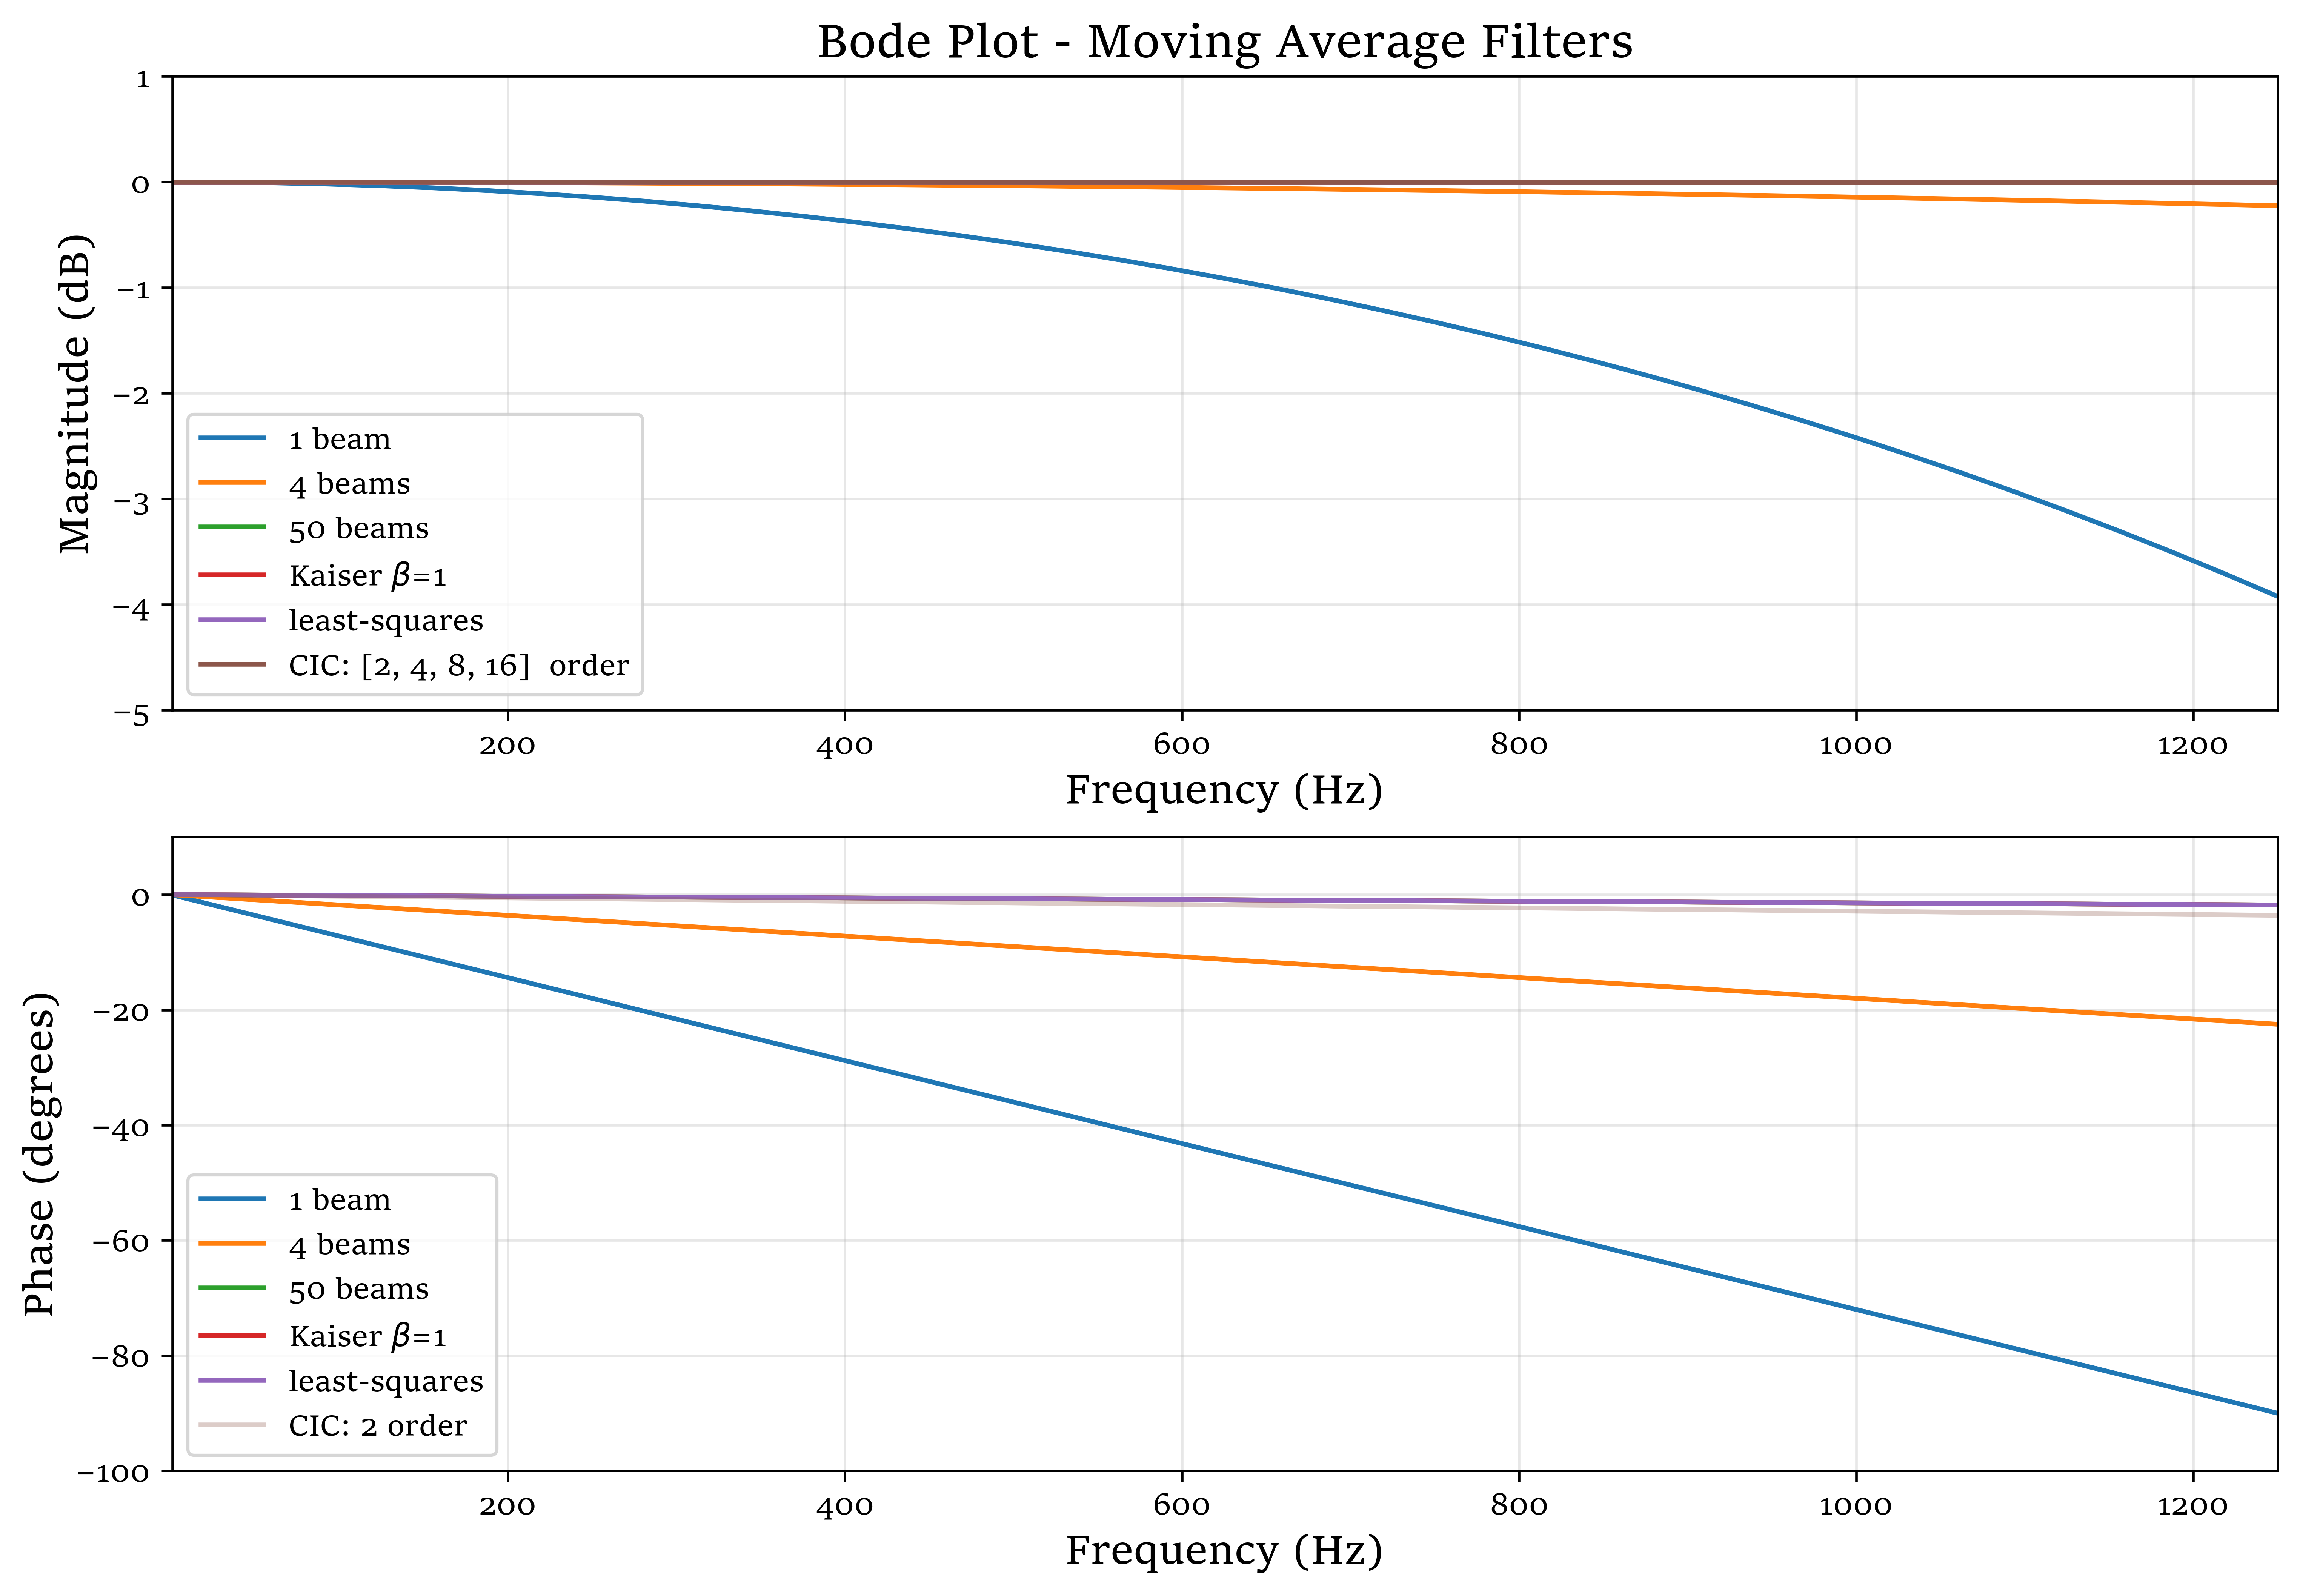

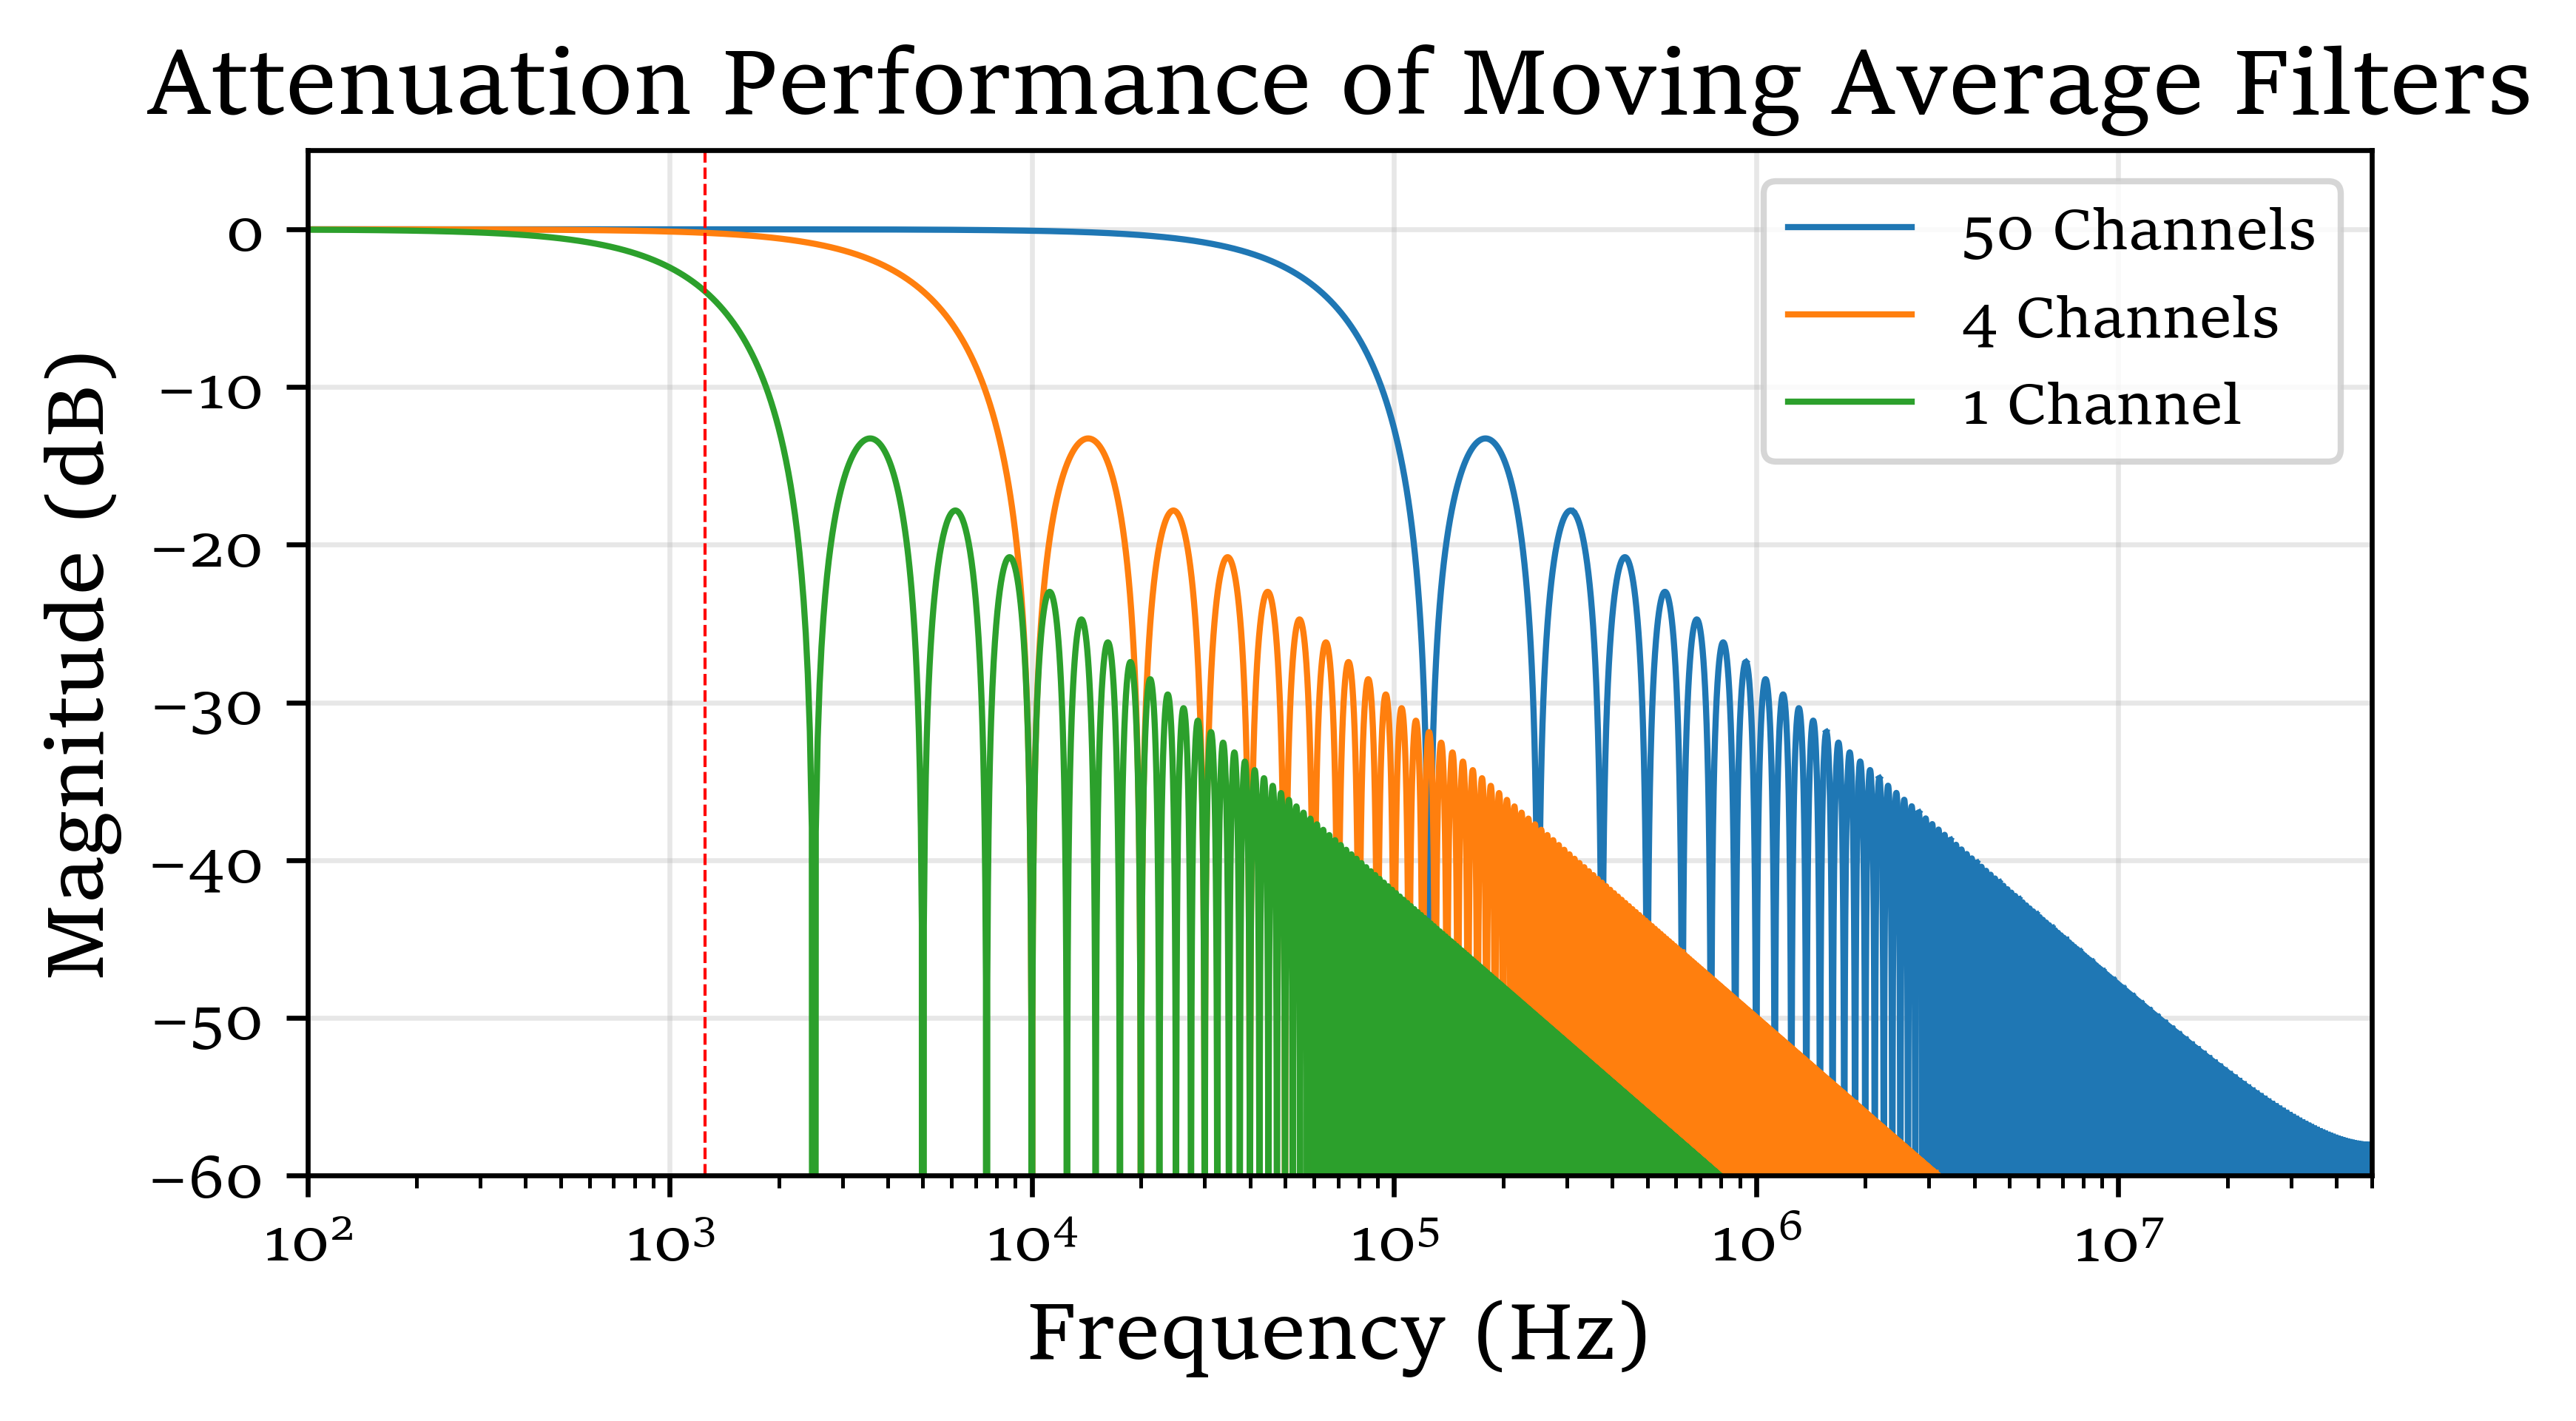

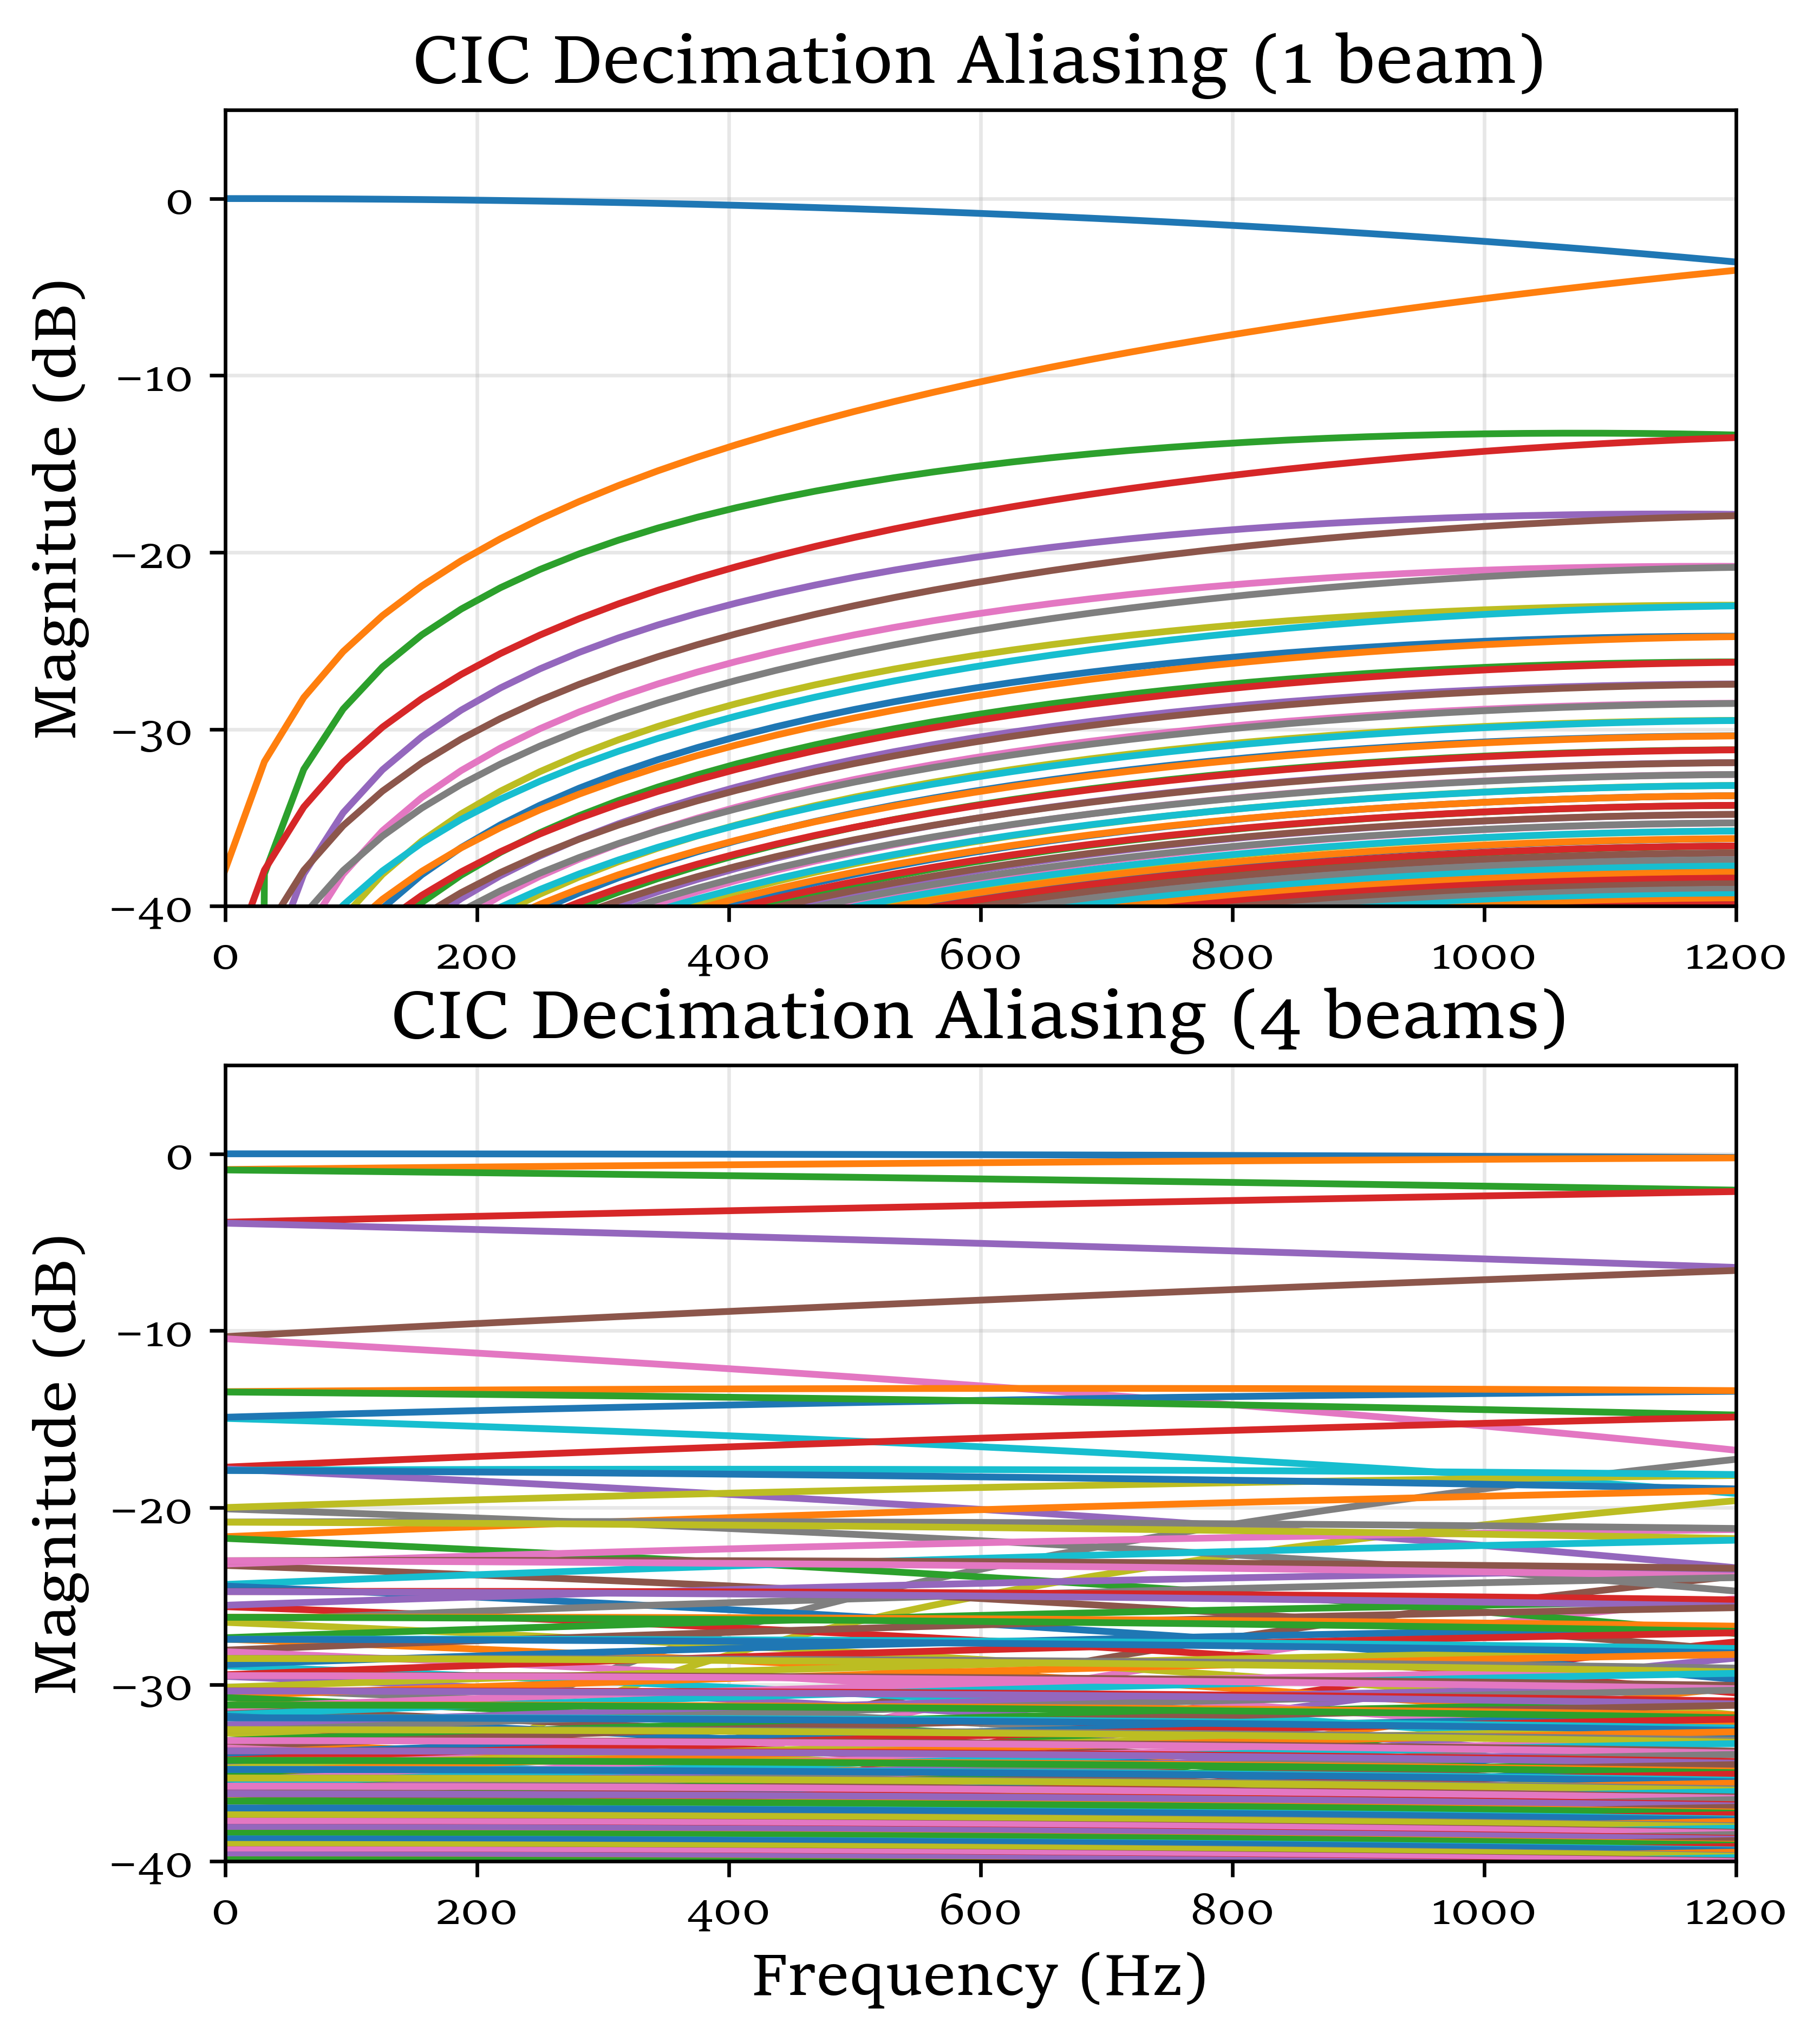

Moving Avg.:     50.0125
Moving Avg. lowpassed:     49.79656
Kaiser $\beta=$1:     50.2455
Kaiser $\beta=$1 lowpassed:     50.08927
Hann:     75.10637
Hann lowpassed:     75.10637
Hamming:     68.21515
Hamming lowpassed:     68.21044
Bartlett:     66.76271
Bartlett lowpassed:     66.76252
Blackman:     86.45843
Blackman lowpassed:     86.45843
Least-squres:     50.07508
Least-squres lowpassed:     49.85884
CIC order:2:     33.34586
CIC order:2 lowpassed:     33.34584
CIC order:4:     23.98077
CIC order:4 lowpassed:     23.98077
CIC order:8:     17.12451
CIC order:8 lowpassed:     17.12451
CIC order:16:     12.17015
CIC order:16 lowpassed:     12.17015


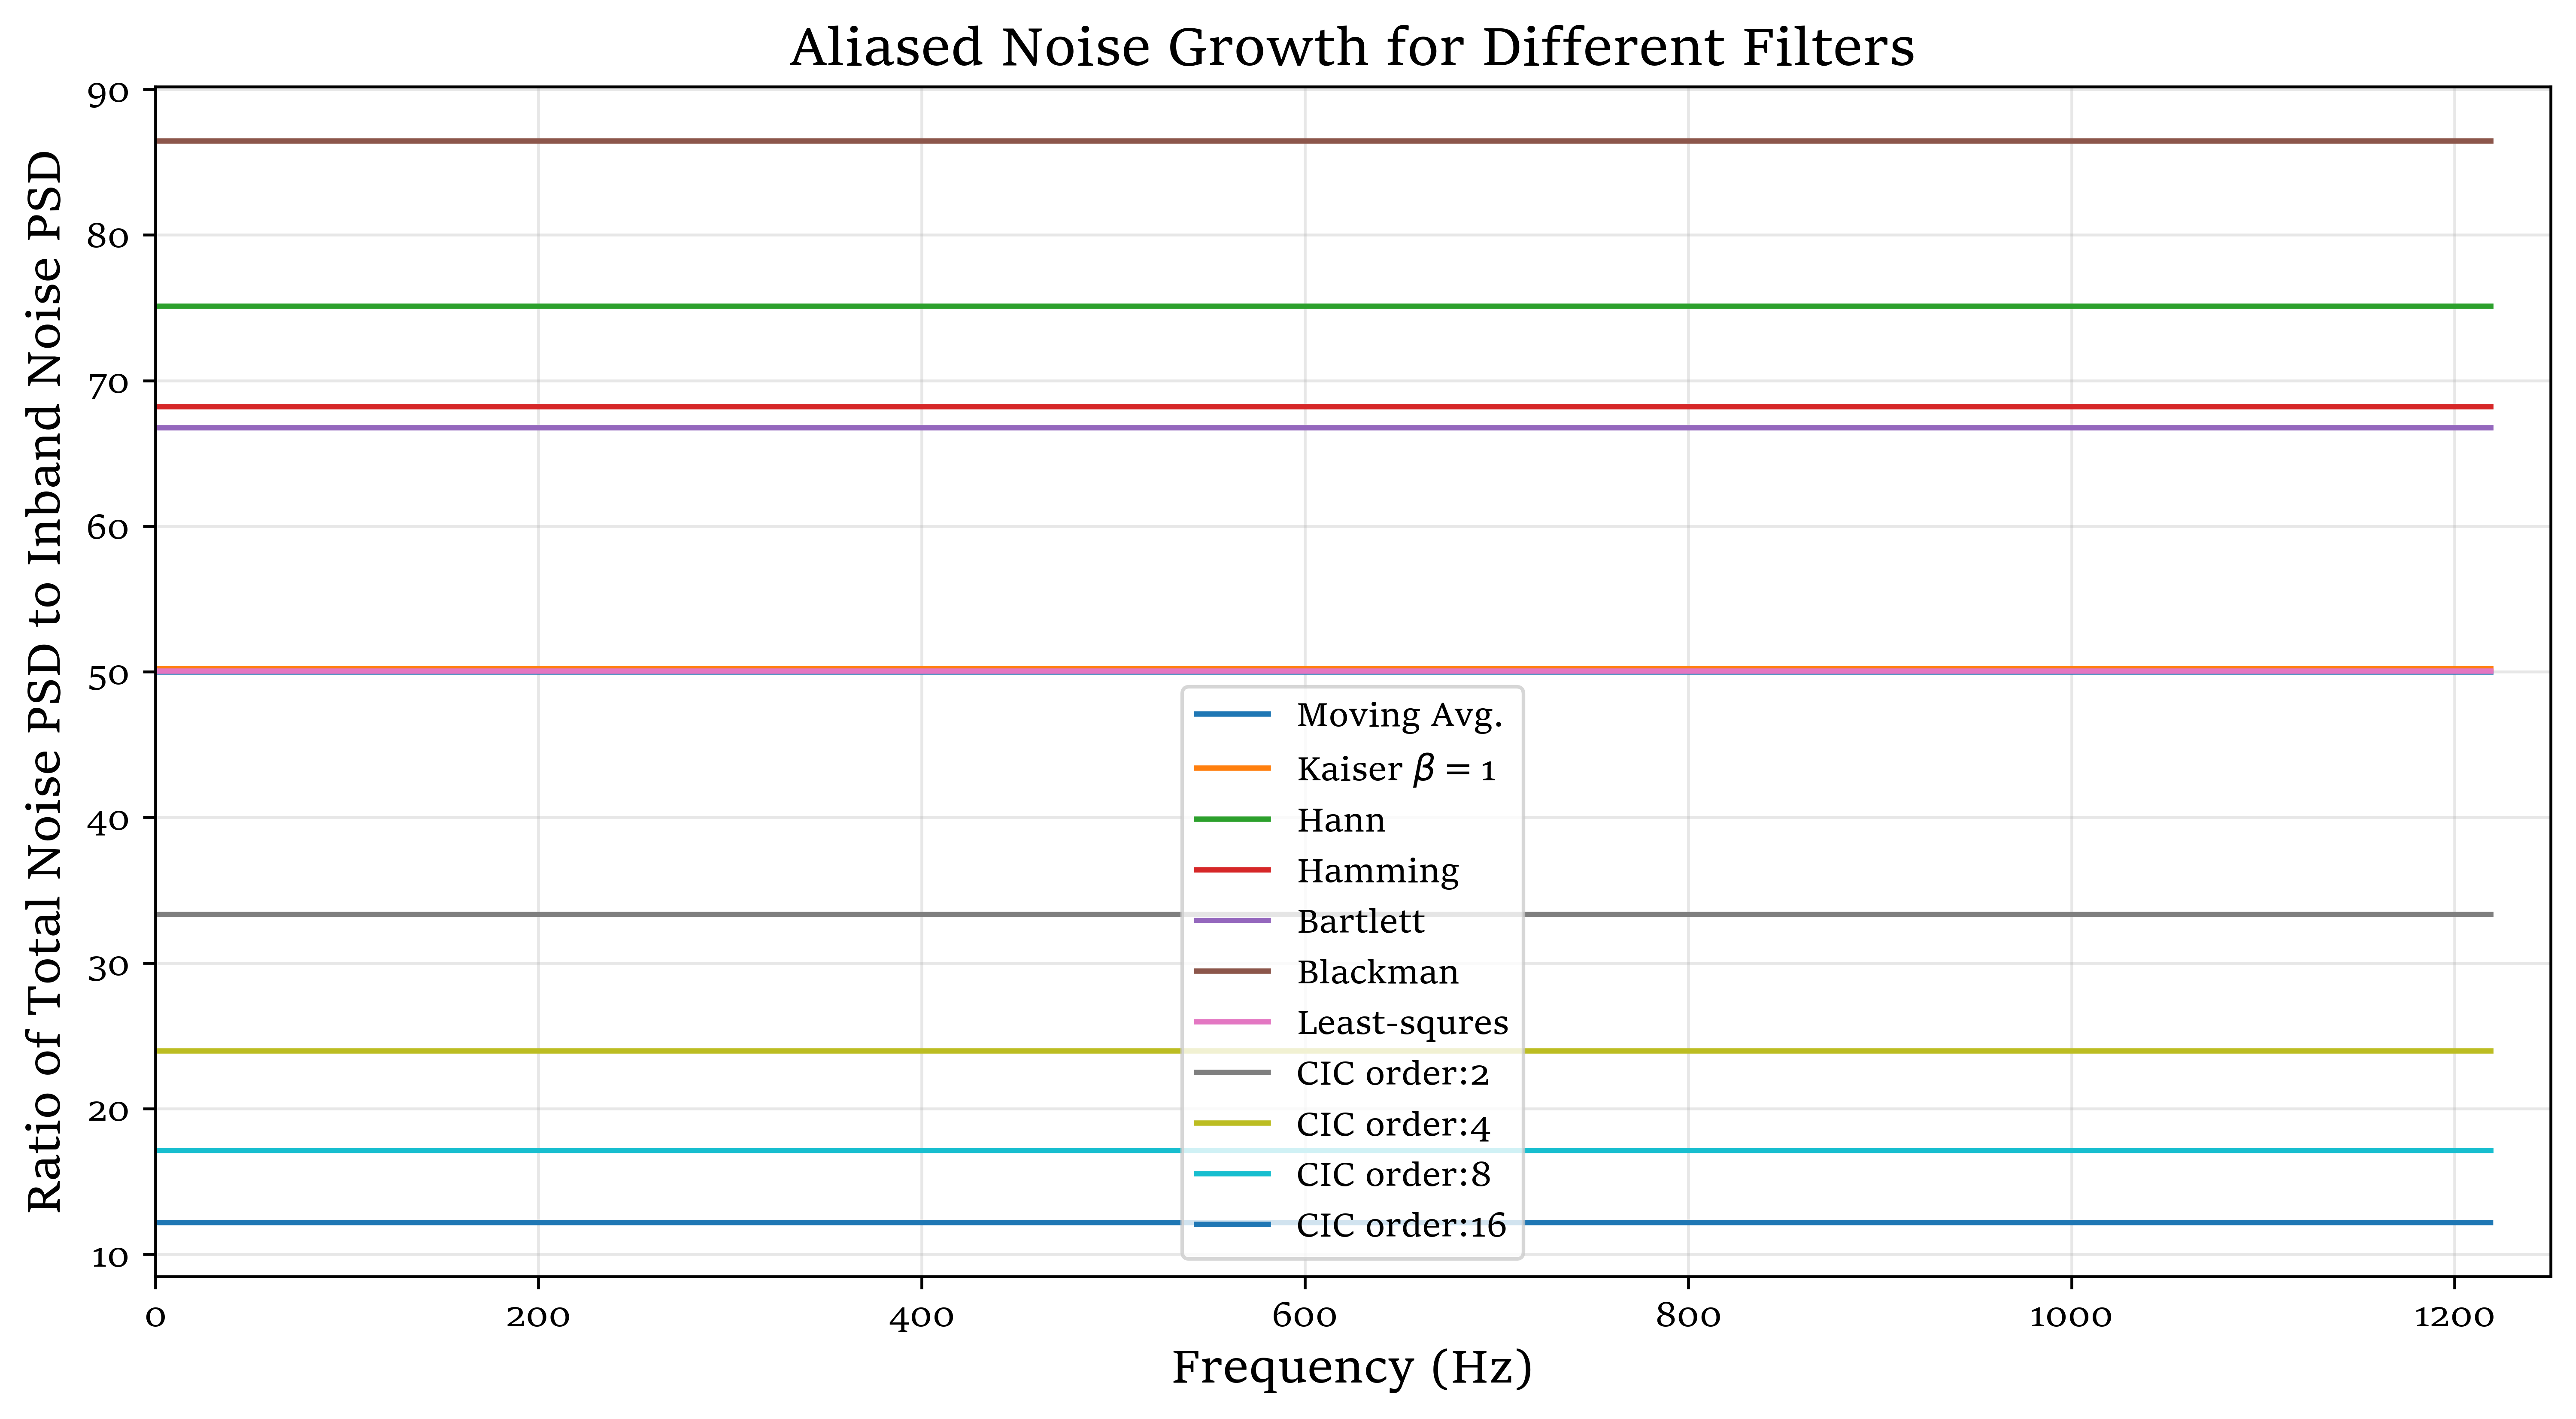

In [13]:
# Parameters
big_array_filter = 800
#For 1 beam, 10 beams, and 50 beams at effective sampling rate of 2.5kHz
filter_length = 40000  # Filter length 400us 1 beam
filter_length_4 = 10000  # Filter length 100us 4 beams
filter_length_50 = big_array_filter  # Filter length 8us
fs = 100e6  # 100 MHz sampling rate
decimation_factor = 40000
fs_new = fs / decimation_factor
f_nyquist_new = fs_new / 2

# Design 2nd order CIC filter with length big_array_filter
cic_order = [2,4,8,16]
cic_b = [ [] for _ in range(len(cic_order))]
for i in range(len(cic_order)):
    cic_b[i] = np.ones(big_array_filter) / big_array_filter
    for _ in range(cic_order[i] - 1):
        cic_b[i] = np.convolve(cic_b[i], np.ones(big_array_filter) / big_array_filter)
    cic_b[i] = cic_b[i] / np.sum(cic_b[i])  # Normalize

# Create Kaiser window filter with length 800
beta_kaiser = 1
kaiser_window = signal.windows.kaiser(big_array_filter, beta=beta_kaiser)
b_kaiser = kaiser_window / np.sum(kaiser_window)

bartlett_window = signal.windows.bartlett(big_array_filter)
b_bartlett = bartlett_window / np.sum(bartlett_window)

hann_window = signal.windows.hann(big_array_filter)
b_hann = hann_window / np.sum(hann_window)

hamming_window = signal.windows.hamming(big_array_filter)
b_hamming = hamming_window / np.sum(hamming_window)

blackman_window = signal.windows.blackman(big_array_filter)
b_blackman = blackman_window / np.sum(blackman_window)


# Create boxcar filter coefficients
b = np.ones(filter_length) / filter_length
b_4 = np.ones(filter_length_4) / filter_length_4
b_50 = np.ones(filter_length_50) / filter_length_50
a = [1]

# Design 800-tap FIR lowpass filter using least-squares (firls)
fp = f_nyquist_new        # passband edge (Hz)
fsb = 2*f_nyquist_new            # stopband edge (Hz)
bands = [0, 2*fp, 2*fsb, fs/2]     # frequency bands in Hz (fs provided below)
desired = [1, 1, 0, 0]         # desired amplitudes in each band
b_firls = signal.firls(big_array_filter-1, bands, desired, fs=fs)
b_firls = b_firls / np.sum(b_firls)  # Normalize to unity gain in passband

# Create transfer function for the designed FIR
system_firls = signal.TransferFunction(b_firls, a)


# Create the filter system
system_o2 = signal.TransferFunction(cic_b[0], a)
system = signal.TransferFunction(b, a)
system_4 = signal.TransferFunction(b_4, a)
system_50 = signal.TransferFunction(b_50, a)
system_kaiser = signal.TransferFunction(b_kaiser, a)

# Generate frequency response
w, h = signal.freqz(b, a, fs=fs, worN=1600000)
w_cic = [ [] for _ in range(len(cic_order))]
h_cic = [ [] for _ in range(len(cic_order))]
for i in range(len(cic_b)):
    w_cic[i], h_cic[i] = signal.freqz(cic_b[i], a, fs=fs, worN=1600000)
w_4, h_4 = signal.freqz(b_4, a, fs=fs, worN=1600000)
w_50, h_50 = signal.freqz(b_50, a, fs=fs, worN=1600000)

w_kaiser, h_kaiser = signal.freqz(b_kaiser, a, fs=fs, worN=1600000)
w_bartlett, h_bartlett = signal.freqz(b_bartlett, a, fs=fs, worN=1600000)
w_hann, h_hann = signal.freqz(b_hann, a, fs=fs, worN=1600000)
w_hamming, h_hamming = signal.freqz(b_hamming, a, fs=fs, worN=1600000)
w_blackman, h_blackman = signal.freqz(b_blackman, a, fs=fs, worN=1600000)

w_firls, h_firls = signal.freqz(b_firls, a, fs=fs, worN=1600000)

tfs = [h_50, h_kaiser, h_hann, h_hamming, h_bartlett, h_blackman, h_firls]
tfs = tfs + h_cic

cicnames = [f'CIC order:{n}' for n in cic_order]
tfnames = ['Moving Avg.',r'Kaiser $\beta=$'+str(beta_kaiser), "Hann", 'Hamming', 'Bartlett', 'Blackman', 'Least-squres'] + cicnames
# Convert frequency to MHz for readability
f_mhz = w / 1e6

# Create white noise PSD with power A=1dB
white_noise_psd = np.ones(len(w))
# Design lowpass filter with cutoff frequency of 3MHz and sampling rate fs
cutoff_freq = 3000000
normalized_cutoff = cutoff_freq / (fs / 2)
b_lpf, a_lpf = signal.butter(4, normalized_cutoff, btype='low')

# Apply filter to white noise PSD
w_lpf, h_lpf = signal.freqz(b_lpf, a_lpf, fs=fs, worN=len(white_noise_psd))
white_lowpass_psd = white_noise_psd * np.abs(h_lpf)**2

# Create Bode plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Magnitude plot (dB)
magnitude_db = 20 * np.log10(np.abs(h))
magnitude_db_o2 = 20 * np.log10(np.abs(h_cic[0]))
magnitude_db_4 = 20 * np.log10(np.abs(h_4))
magnitude_db_50 = 20 * np.log10(np.abs(h_50))
magnitude_db_kaiser = 20 * np.log10(np.abs(h_kaiser))
magnitude_db_firls = 20 * np.log10(np.abs(h_firls))

ax1.plot(w, magnitude_db, linewidth=1.5, label='1 beam')
ax1.plot(w_4, magnitude_db_4, linewidth=1.5, label='4 beams')
ax1.plot(w_50, magnitude_db_50, linewidth=1.5, label='50 beams')
ax1.plot(w_kaiser, magnitude_db_kaiser, linewidth=1.5, label=r'Kaiser $\beta$='+str(round(beta_kaiser, 1)))
ax1.plot(w_firls, magnitude_db_firls, linewidth=1.5, label='least-squares')
ax1.plot(w_cic[0], magnitude_db_o2, linewidth=1.5, label=f'CIC: {cic_order}  order')

#for x_val in np.arange(0, fs/2, fs/(2*decimation_factor)):
#    ax1.axvline(x=x_val, color='red', linestyle='--', alpha=0.5, linewidth=0.8)

ax1.set_ylabel('Magnitude (dB)')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_title(f'Bode Plot - Moving Average Filters')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([1, f_nyquist_new])
ax1.set_ylim([-5, 1])
ax1.legend(loc='lower left')

# Phase plot (degrees)
phase_deg = np.angle(h, deg=True)
phase_deg_o2 = np.angle(h_cic[0], deg=True)
phase_deg_4 = np.angle(h_4, deg=True)
phase_deg_50 = np.angle(h_50, deg=True)
phase_deg_kaiser = np.angle(h_kaiser, deg=True)
phase_deg_firls = np.angle(h_firls, deg=True)
ax2.plot(w, phase_deg, linewidth=1.5, label='1 beam')
ax2.plot(w_4, phase_deg_4, linewidth=1.5, label='4 beams')
ax2.plot(w_50, phase_deg_50, linewidth=1.5, label='50 beams')
ax2.plot(w_kaiser, phase_deg_kaiser, linewidth=1.5, label=r'Kaiser $\beta$='+str(round(beta_kaiser, 1)))
ax2.plot(w_firls, phase_deg_firls, linewidth=1.5, label='least-squares')
ax2.plot(w_cic[0], phase_deg_o2, linewidth=1.5, alpha=0.3,label=f'CIC: {cic_order[0]} order')
ax2.legend(loc='lower left')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (degrees)')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([1, f_nyquist_new])
ax2.set_ylim([-100, 10])

plt.show()

fig_whole, ax_whole = plt.subplots(figsize=(6, 3))
ax_whole.semilogx(w_50, magnitude_db_50, linewidth=1, label='50 Channels')
#ax_whole.semilogx(w_o2, magnitude_db_o2, linewidth=1.5, label=f'CIC: {cic_order} order')
ax_whole.semilogx(w_4, magnitude_db_4, linewidth=1, label='4 Channels')
ax_whole.semilogx(w, magnitude_db, linewidth=1, label='1 Channel')
#ax_whole.semilogx(w_kaiser, magnitude_db_kaiser, linewidth=1.5, label=r'Kaiser $\beta$='+str(round(beta_kaiser, 1)))
#ax_whole.semilogx(w_firls, magnitude_db_firls, linewidth=1.5, label='least-squares')

#for x_val in np.arange(0, fs/2, fs/(2*decimation_factor)):
#    ax_whole.axvline(x=x_val, color='red', linestyle='--', alpha=0.5, linewidth=0.8)

ax_whole.set_ylabel('Magnitude (dB)')
ax_whole.set_xlabel('Frequency (Hz)')
ax_whole.set_title(f'Attenuation Performance of Moving Average Filters')
ax_whole.axvline(x=f_nyquist_new, color='r', linestyle='--', linewidth=0.5)
ax_whole.grid(True, alpha=0.3)
ax_whole.set_xlim([100, fs/2])
ax_whole.set_ylim([-60, 5])
ax_whole.legend()

# Plot magnitude response aliased to new sampling rate
noise_aliased = [[] for _ in range(len(tfs))]
noise_low_aliased = [[] for _ in range(len(tfs))]


fig_aliased, (ax_aliased, ax_aliased2) = plt.subplots(2,1,figsize=(6, 7))

for i in range(decimation_factor):
    x_start = int(round((len(magnitude_db)/(decimation_factor)*i)))
    x_stop  = int(round((len(magnitude_db)/(decimation_factor)*(i+1))))
    w_new = w[x_start:x_stop] - fs/2/decimation_factor*i
    if i == 0:
        for j in range(len(tfs)):
            noise_aliased[j] = white_noise_psd[x_start:x_stop] * np.abs(tfs[j][x_start:x_stop])**2
            noise_low_aliased[j] = white_lowpass_psd[x_start:x_stop]* np.abs(tfs[j][x_start:x_stop])**2
    else:
        if i%2==0:
            for j in range(len(tfs)):
                noise_aliased[j] = noise_aliased[j] + white_noise_psd[x_start:x_stop] * np.abs(tfs[j][x_start:x_stop])**2
                noise_low_aliased[j] = noise_low_aliased[j] + white_lowpass_psd[x_start:x_stop]* np.abs(tfs[j][x_start:x_stop])**2
        else:
            for j in range(len(tfs)):
                noise_aliased[j] = noise_aliased[j] + white_noise_psd[x_start:x_stop] * np.flip(np.abs(tfs[j][x_start:x_stop])**2)
                noise_low_aliased[j] = noise_low_aliased[j] + white_lowpass_psd[x_start:x_stop]* np.flip(np.abs(tfs[j][x_start:x_stop])**2)


    if i%2==0:
        ax_aliased.plot(w_new, magnitude_db[x_start:x_stop])
        ax_aliased2.plot(w_new, magnitude_db_4[x_start:x_stop])
    else:
        ax_aliased.plot(w_new, np.flip(magnitude_db[x_start:x_stop]))
        ax_aliased2.plot(w_new, np.flip(magnitude_db_4[x_start:x_stop]))

ax_aliased2.set_xlabel('Frequency (Hz)')
ax_aliased.set_ylabel('Magnitude (dB)')
ax_aliased2.set_ylabel('Magnitude (dB)')
ax_aliased.set_title(f'CIC Decimation Aliasing (1 beam)')
ax_aliased2.set_title(f'CIC Decimation Aliasing (4 beams)')
ax_aliased.grid(True, alpha=0.3)
ax_aliased2.grid(True, alpha=0.3)
ax_aliased.set_xlim([0, 1200])
ax_aliased2.set_xlim([0, 1200])
ax_aliased.set_ylim([-40, 5])
ax_aliased2.set_ylim([-40, 5])

plt.show()

fig_noise, ax_noise = plt.subplots(figsize=(12, 6))
for i in range(len(tfs)):
    ax_noise.plot(w_new, noise_aliased[i], label = tfnames[i])
ax_noise.set_xlabel('Frequency (Hz)')
ax_noise.set_ylabel('Ratio of Total Noise PSD to Inband Noise PSD')
ax_noise.set_title(f'Aliased Noise Growth for Different Filters')
ax_noise.grid(True, alpha=0.3)
ax_noise.legend()
ax_noise.set_xlim([0, f_nyquist_new])

for i in range(len(noise_aliased)):
    print(tfnames[i] +':     '+ str(round(np.mean(noise_aliased[i][:int(len(noise_aliased[i])/3)]),5)))
    print(tfnames[i] + ' lowpassed:     ' + str(round(np.mean(noise_low_aliased[i][:int(len(noise_low_aliased[i])/3)]),5)))
    
plt.show()

C:\Users\bensi\AppData\Local\Temp\ipykernel_31556\502364013.py:32: RuntimeWarning: invalid value encountered in divide
  h_zoh = 2*np.sin(w_cic*np.pi*L/fs)/(w_cic*2*np.pi*L/fs)
C:\Users\bensi\AppData\Local\Temp\ipykernel_31556\502364013.py:39: RuntimeWarning: invalid value encountered in divide
  h_foh = 4*np.sin(w_cic*np.pi*L/fs)**2 / (w_cic*2*np.pi*L/fs)**2
C:\Users\bensi\AppData\Local\Temp\ipykernel_31556\502364013.py:43: RuntimeWarning: invalid value encountered in divide
  h_fohex = 4*np.sqrt(1+(w_cic*2*np.pi*L/fs)**2) * np.sin(w_cic*np.pi*L/fs)**2 / (w_cic*2*np.pi*L/fs)**2


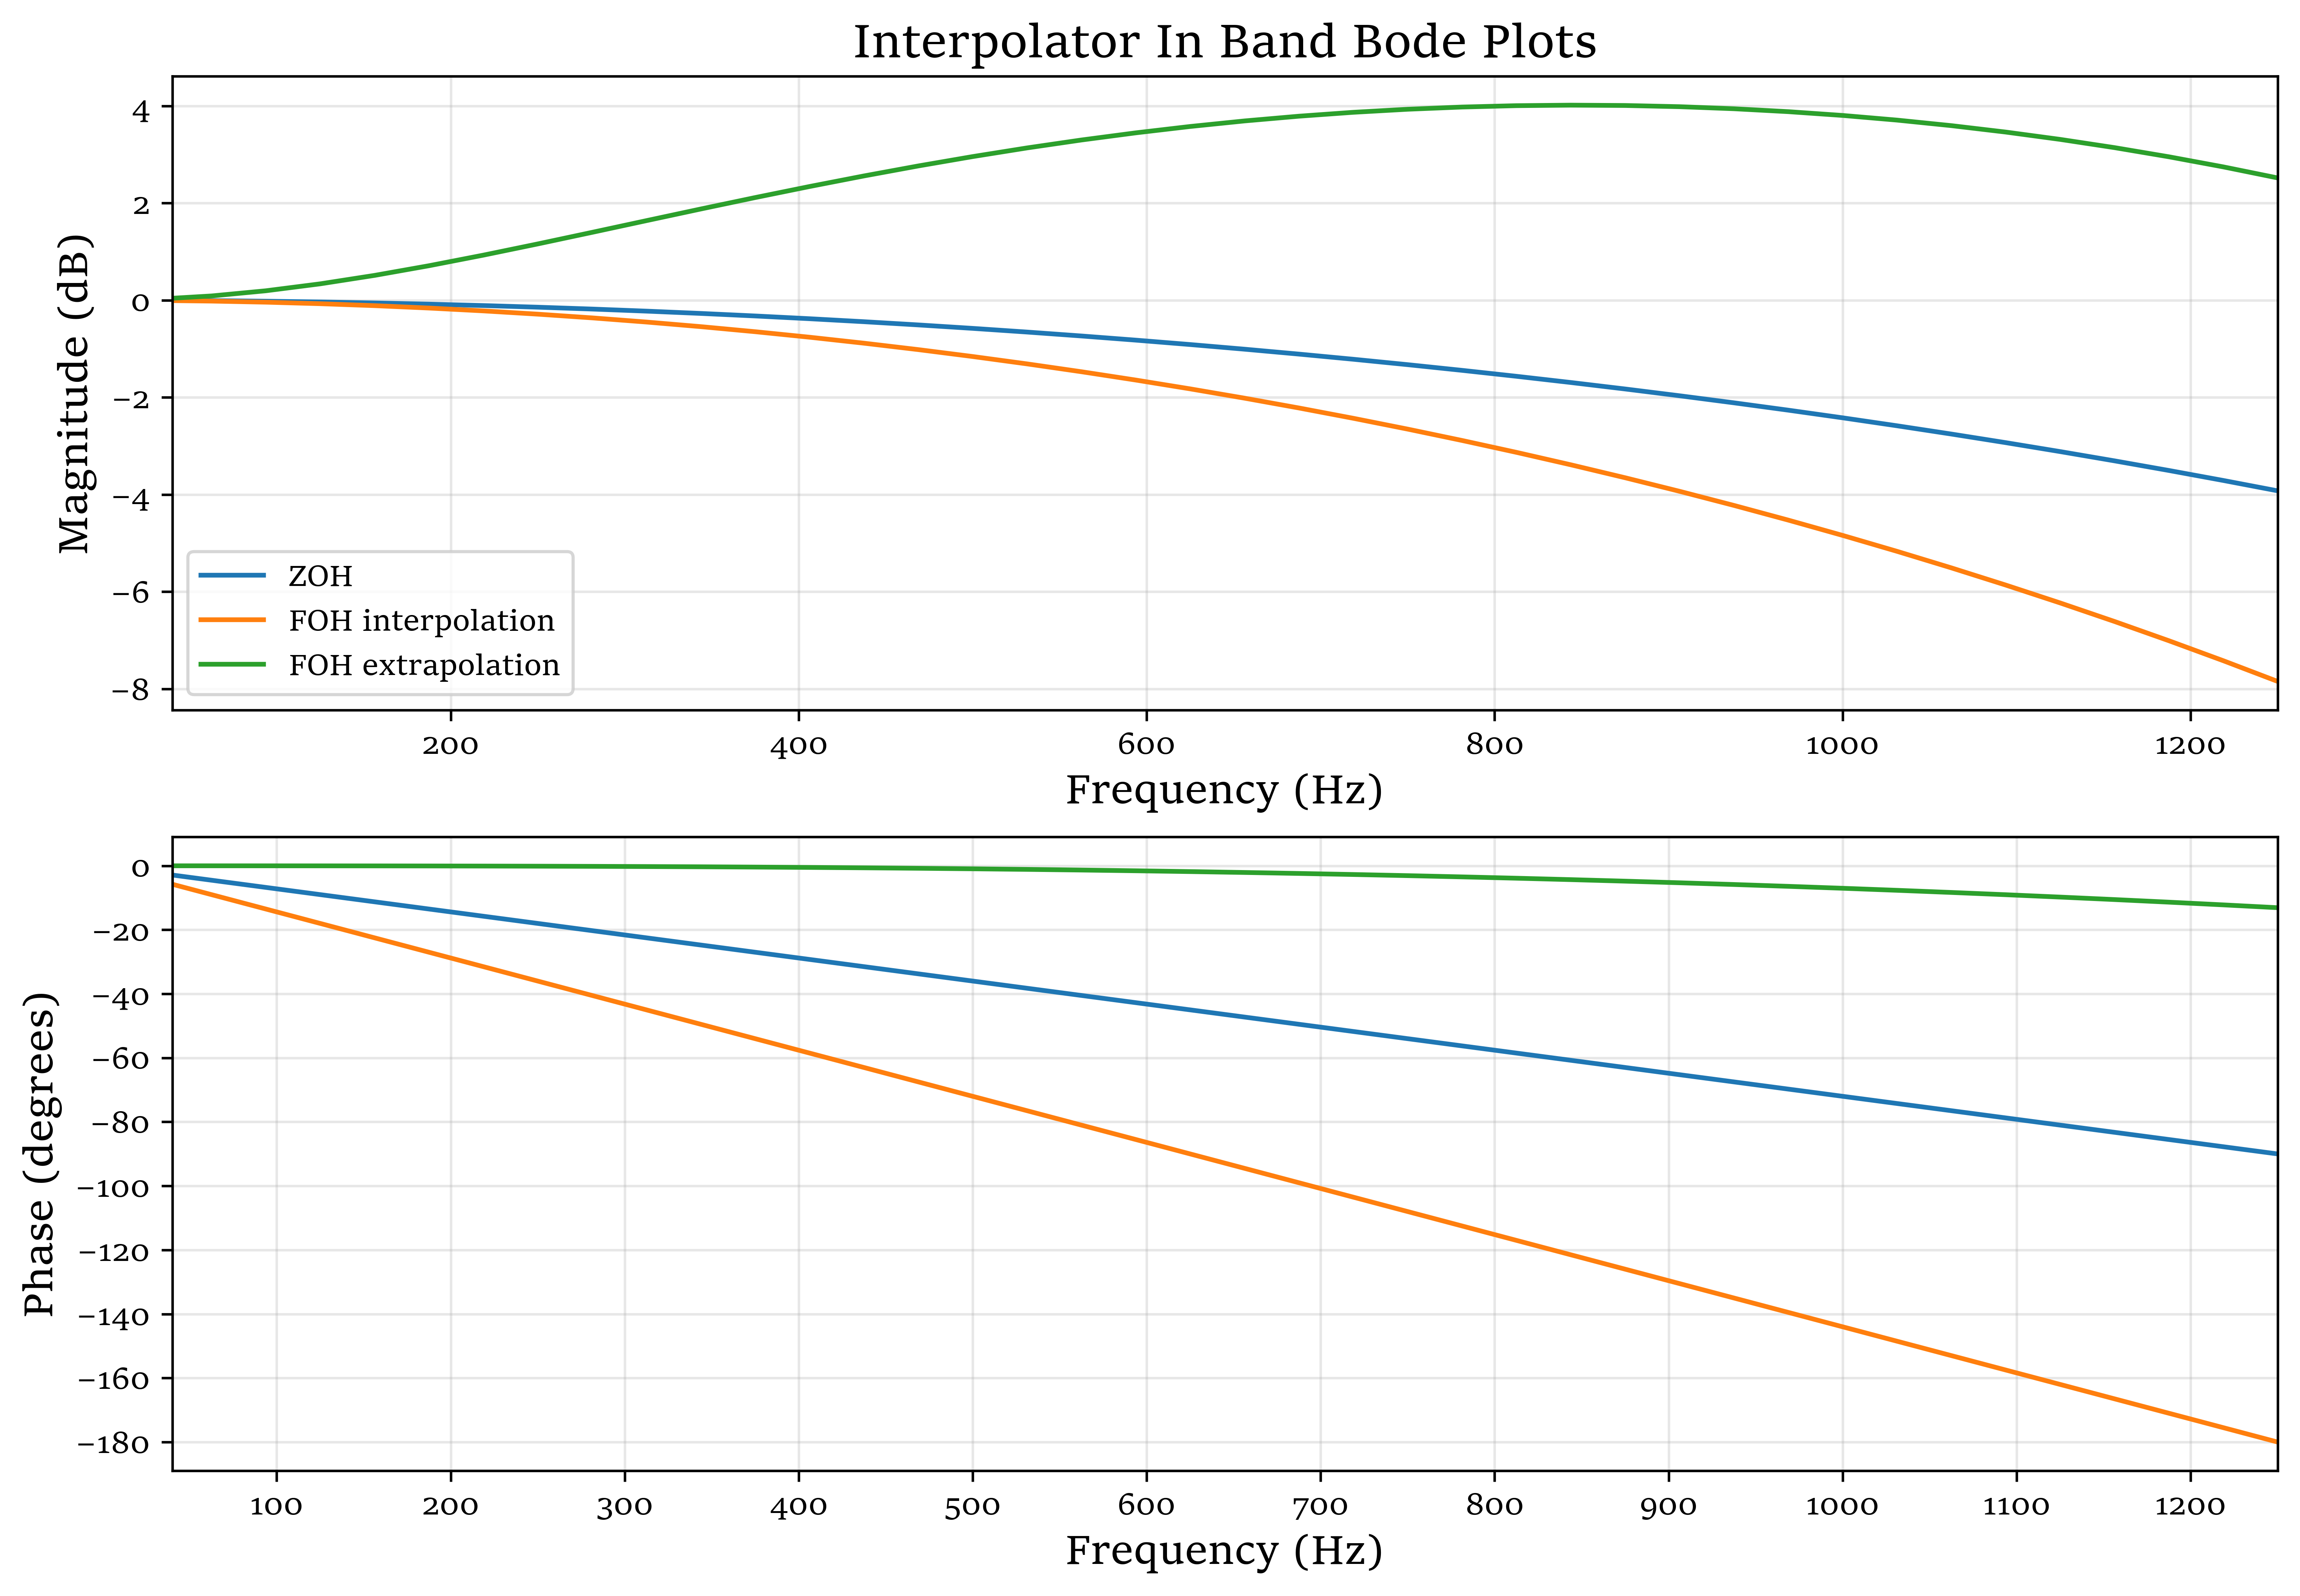

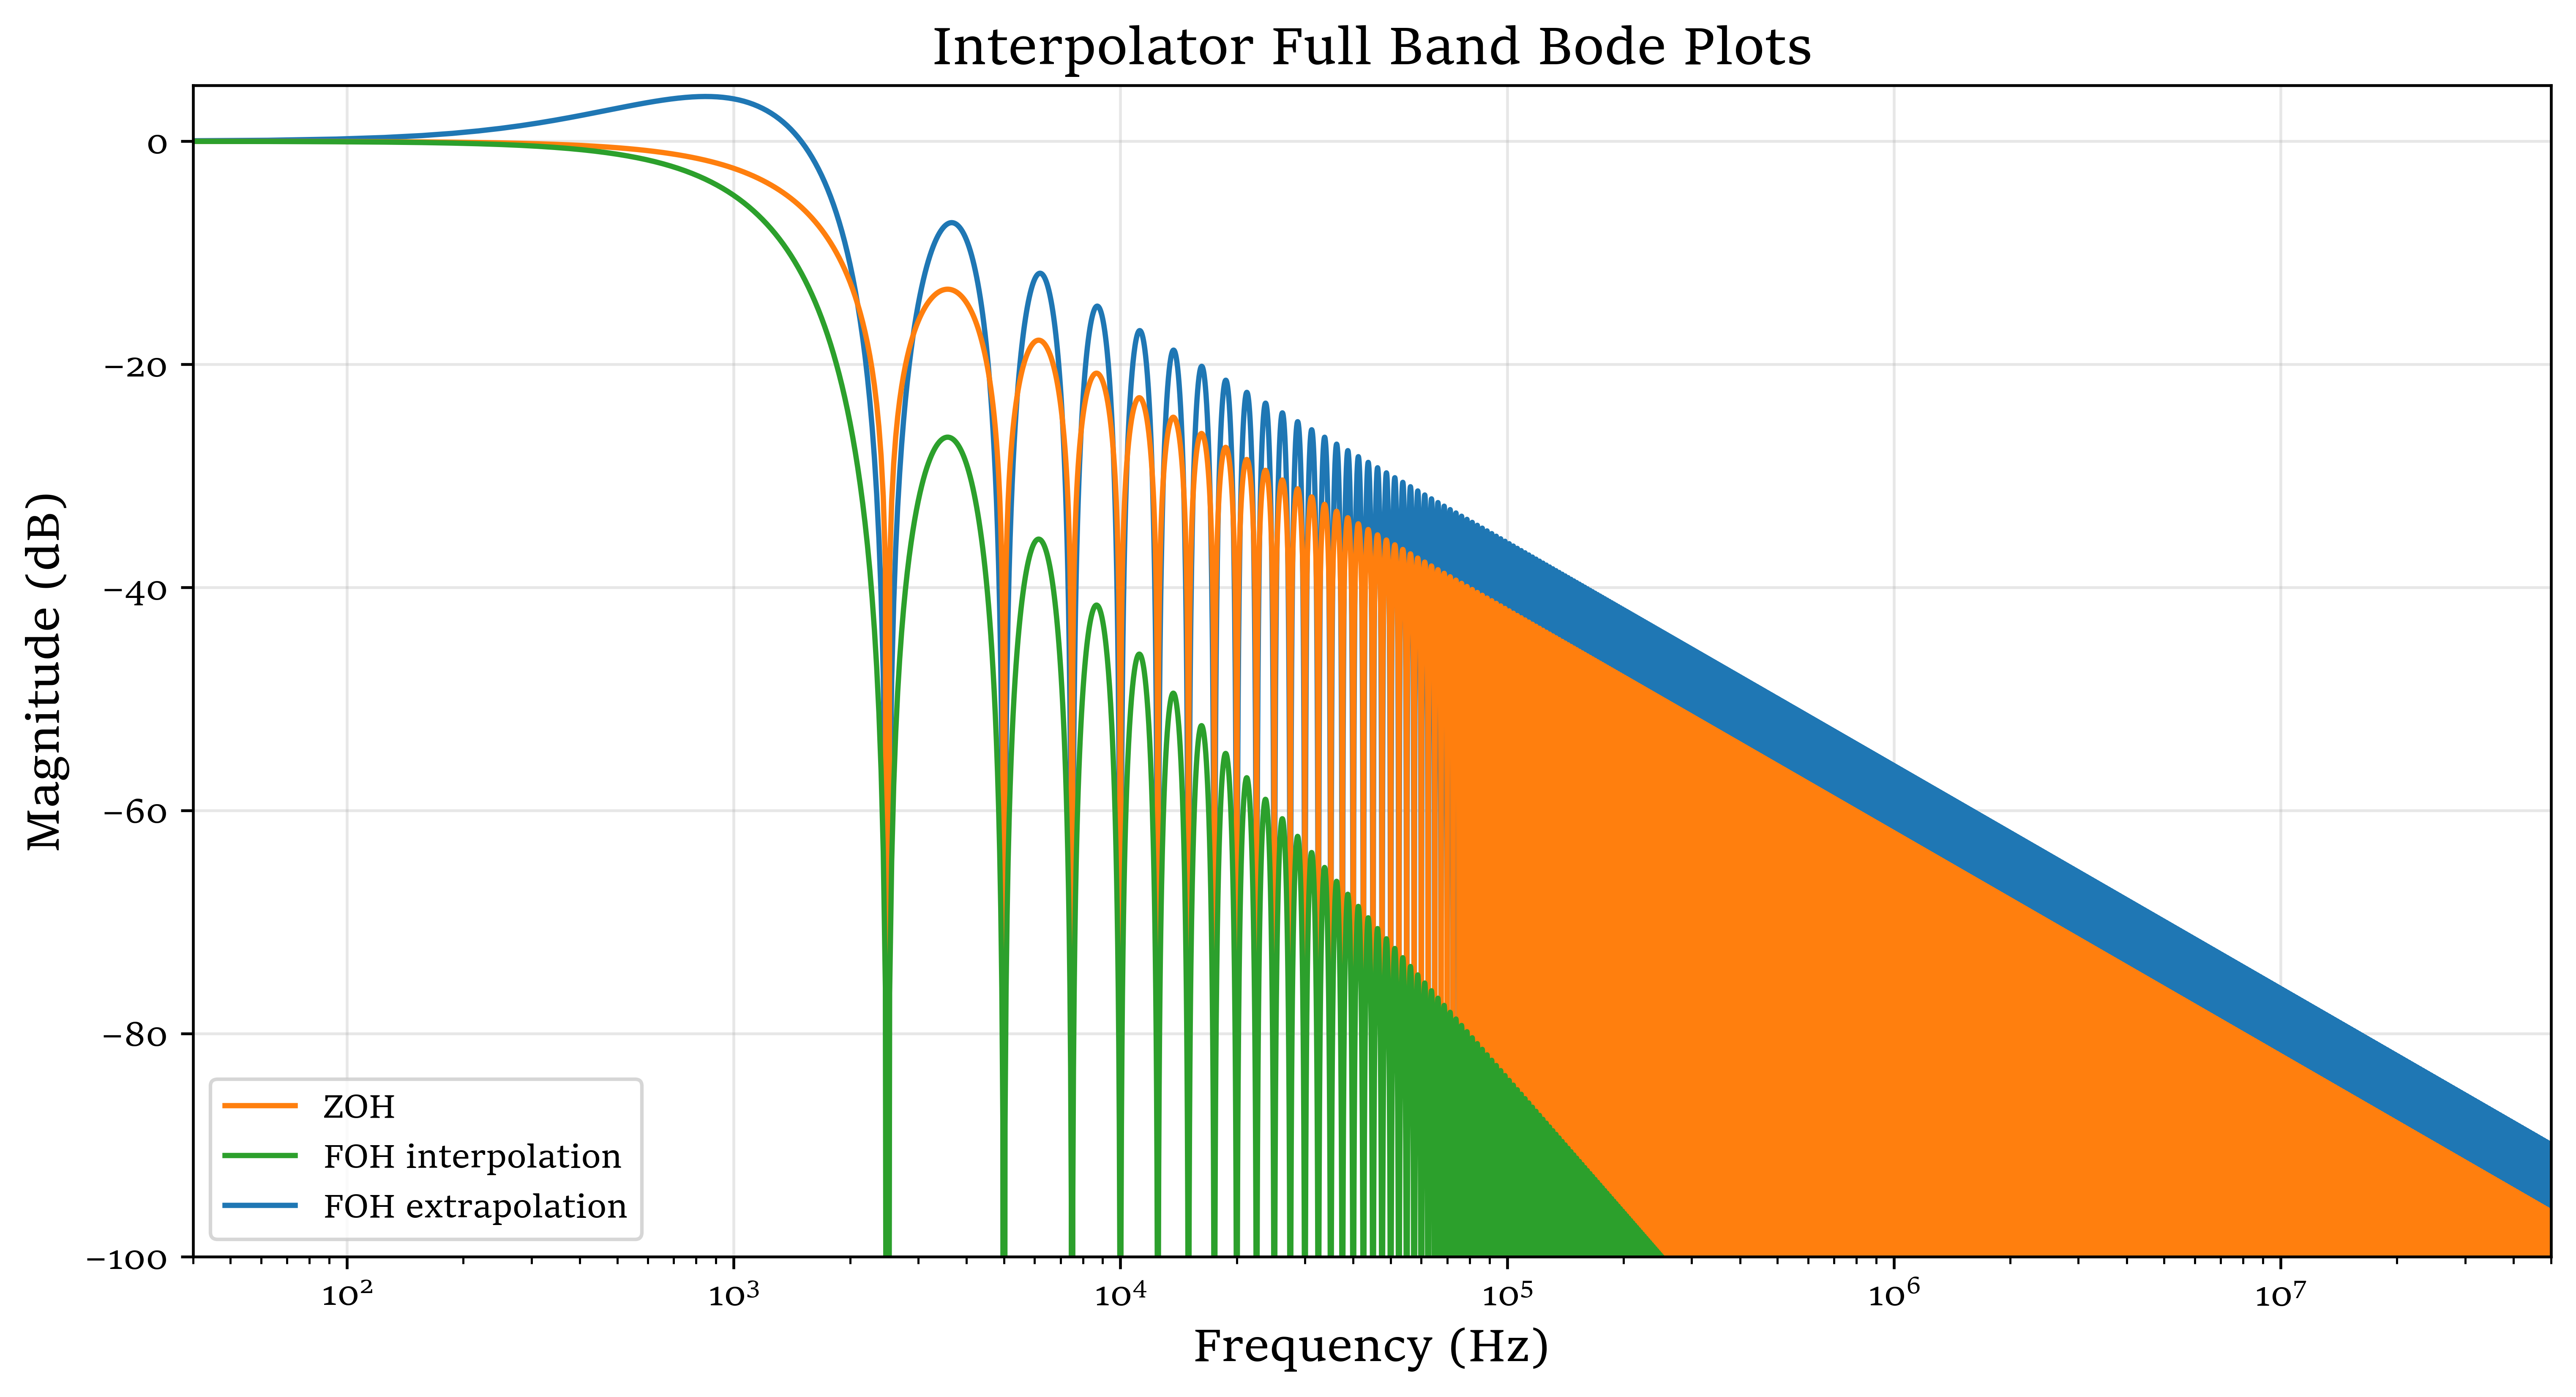

In [108]:
mpl.rcParams['agg.path.chunksize'] = 10000 
# Design zero order hold (ZOH) interpolator
# ZOH transfer function: H(s) = (1 - exp(-s*Ts)) / s, where Ts is the sampling period
# In discrete-time: H(z) = (1 - z^-1) / (1 - z^-1) for interpolation by factor L

# Parameters
fs = 100000000  # Sampling frequency (Hz)
L = 40000  # Interpolation factor (same as decimation factor for reconstruction)
Ts = 1 / fs  # Sampling period (fs from previous cells)

# Design Nth order CIC filter
cic_order = 2
cic_b = np.ones(L) / L
cic_c = []
for _ in range(cic_order - 1):
    cic_c = np.convolve(cic_b, np.ones(L) / L)
cic_c = cic_c / np.sum(cic_c)  # Normalize

# Compute frequency response for CIC filter
w_cic, h_cic = signal.freqz(cic_b, [1], fs=fs, worN=1600000)
magnitude_cic_db = 20 * np.log10(np.abs(h_cic) + 1e-10)
phase_cic_deg = np.angle(h_cic, deg=True)

w_cic2, h_cic2 = signal.freqz(cic_c, [1], fs=fs, worN=1600000)
magnitude_cic2_db = 20 * np.log10(np.abs(h_cic2) + 1e-10)
phase_cic2_deg = np.angle(h_cic2, deg=True)
# Create transfer function

# ZOH in continuous time approximation
# H(s) = (1 - exp(-s*Ts)) / s ≈ 1 for low frequencies
# Magnitude and phase
h_zoh = 2*np.sin(w_cic*np.pi*L/fs)/(w_cic*2*np.pi*L/fs)
magnitude_zoh_db = 20 * np.log10(np.abs(h_zoh) + 1e-10)
phase_zoh_deg = -L/(2*fs) * w_cic * 360

# Design first order hold (FOH) interpolator
# FOH linearly interpolates between samples
# Transfer function: H(z) = (1 - z^-1) for single interpolation
h_foh = 4*np.sin(w_cic*np.pi*L/fs)**2 / (w_cic*2*np.pi*L/fs)**2
magnitude_foh_db = 20 * np.log10(np.abs(h_foh) + 1e-10)
phase_foh_deg = -L/(fs) * w_cic * 360

h_fohex = 4*np.sqrt(1+(w_cic*2*np.pi*L/fs)**2) * np.sin(w_cic*np.pi*L/fs)**2 / (w_cic*2*np.pi*L/fs)**2
magnitude_fohex_db = 20 * np.log10(np.abs(h_fohex) + 1e-10)
phase_fohex_deg = (np.atan(L/(fs) * w_cic) -L/(fs) * w_cic) * 360

# Plot ZOH response
fig_zoh, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(w_cic[:int(1600000/L)+1], magnitude_zoh_db[:int(1600000/L)+1], linewidth=1.5, label='ZOH')
ax1.plot(w_cic[:int(1600000/L)+1], magnitude_foh_db[:int(1600000/L)+1], linewidth=1.5, label='FOH interpolation')
#ax1.plot(w_cic[:int(1600000/L)+1], magnitude_cic_db[:int(1600000/L)+1], 'b--', linewidth=1, label='CIC N=1') # CIC1 same as ZOH
#ax1.plot(w_cic2[:int(1600000/L)+1], magnitude_cic2_db[:int(1600000/L)+1], 'b:', linewidth=1, label='CIC N=2') # CIC2 same as FOH
ax1.plot(w_cic[:int(1600000/L)+1], magnitude_fohex_db[:int(1600000/L)+1], linewidth=1.5, label='FOH extrapolation')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_title('Interpolator In Band Bode Plots')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([40, w_cic[int(1600000/L)]])
#ax1.set_ylim([-60, 5])
ax1.legend(loc='lower left')

ax2.plot(w_cic[:int(1600000/L)+1], phase_zoh_deg[:int(1600000/L)+1], linewidth=1.5, label='ZOH')
ax2.plot(w_cic[:int(1600000/L)+1], phase_foh_deg[:int(1600000/L)+1], linewidth=1.5, label='FOH interpolation')
#ax2.plot(w_cic[:int(1600000/L)+1], phase_cic_deg[:int(1600000/L)+1], 'b--', linewidth=1, label='CIC N=1')
#ax2.plot(w_cic2[:int(1600000/L)+1], phase_cic2_deg[:int(1600000/L)+1], 'b:', linewidth=1, label='CIC N=2')
ax2.plot(w_cic[:int(1600000/L)+1], phase_fohex_deg[:int(1600000/L)+1], linewidth=1.5, label='FOH extrapolation')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (degrees)')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([40, w_cic[int(1600000/L)]])
ax2.xaxis.set_major_locator(plt.MultipleLocator(100))
ax2.yaxis.set_major_locator(plt.MultipleLocator(20))
#ax2.yaxis.set_minor_locator(plt.MultipleLocator(5))

fig_zfull, ax_zoh2 = plt.subplots(figsize=(12, 6))
ax_zoh2.semilogx(w_cic, magnitude_fohex_db, linewidth=1.5, label='FOH extrapolation')
ax_zoh2.semilogx(w_cic, magnitude_zoh_db, linewidth=1.5, label='ZOH')
ax_zoh2.semilogx(w_cic, magnitude_foh_db, linewidth=1.5, label='FOH interpolation')
#ax_zoh2.semilogx(w_cic, magnitude_cic_db, 'b--', linewidth=1, label='CIC N=1')
#ax_zoh2.semilogx(w_cic2, magnitude_cic2_db, 'b:', linewidth=1, label='CIC N=2')
ax_zoh2.set_xlabel('Frequency (Hz)')
ax_zoh2.set_ylabel('Magnitude (dB)')
ax_zoh2.set_title('Interpolator Full Band Bode Plots')
ax_zoh2.grid(True, alpha=0.3)
ax_zoh2.set_xlim([40, fs/2])
ax_zoh2.set_ylim([-100, 5])
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
ax_zoh2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower left')

plt.show()



In [111]:

# Generate timestream with sine wave input
t_stream = np.arange(-1/600, 1.5/300, Ts)  # timestream
t_stream_dec = np.arange(-1/600, 1.5/300, L*Ts)  # timestream after decimation
f_sine = 300  # Hz sine wave
sine_input = np.sin(2 * np.pi * f_sine * t_stream)
sin_input_dec = np.sin(2 * np.pi * f_sine * t_stream_dec)
sin_input_zeropad = np.zeros(len(sine_input))
sin_input_zeropad[::L] = sin_input_dec
# Apply ZOH filter (simple sample-and-hold)
sine_zoh = np.repeat(sine_input[::L], L)[:len(sine_input)]

#Apply FOH filter (linear interpolation)
sine_foh = np.interp(t_stream, t_stream_dec, np.concat([[0],sin_input_dec[:-1]]))

sine_fohex = np.zeros(len(sine_input))
for i in range(len(sine_fohex)):
    sine_fohex[i] = sin_input_dec[i//L]  + (sin_input_dec[i//L] - sin_input_dec[i//L - 1])*(i%L)/L

# Apply CIC filter
sine_cic = signal.lfilter(cic_b*L, [1], sin_input_zeropad)
sin_cic2 = signal.lfilter(cic_c*L, [1], sin_input_zeropad)

#Apply partial rectangular window FIR filter
b = np.ones(800)
sine_fir = signal.lfilter(b, [1], sin_input_zeropad)

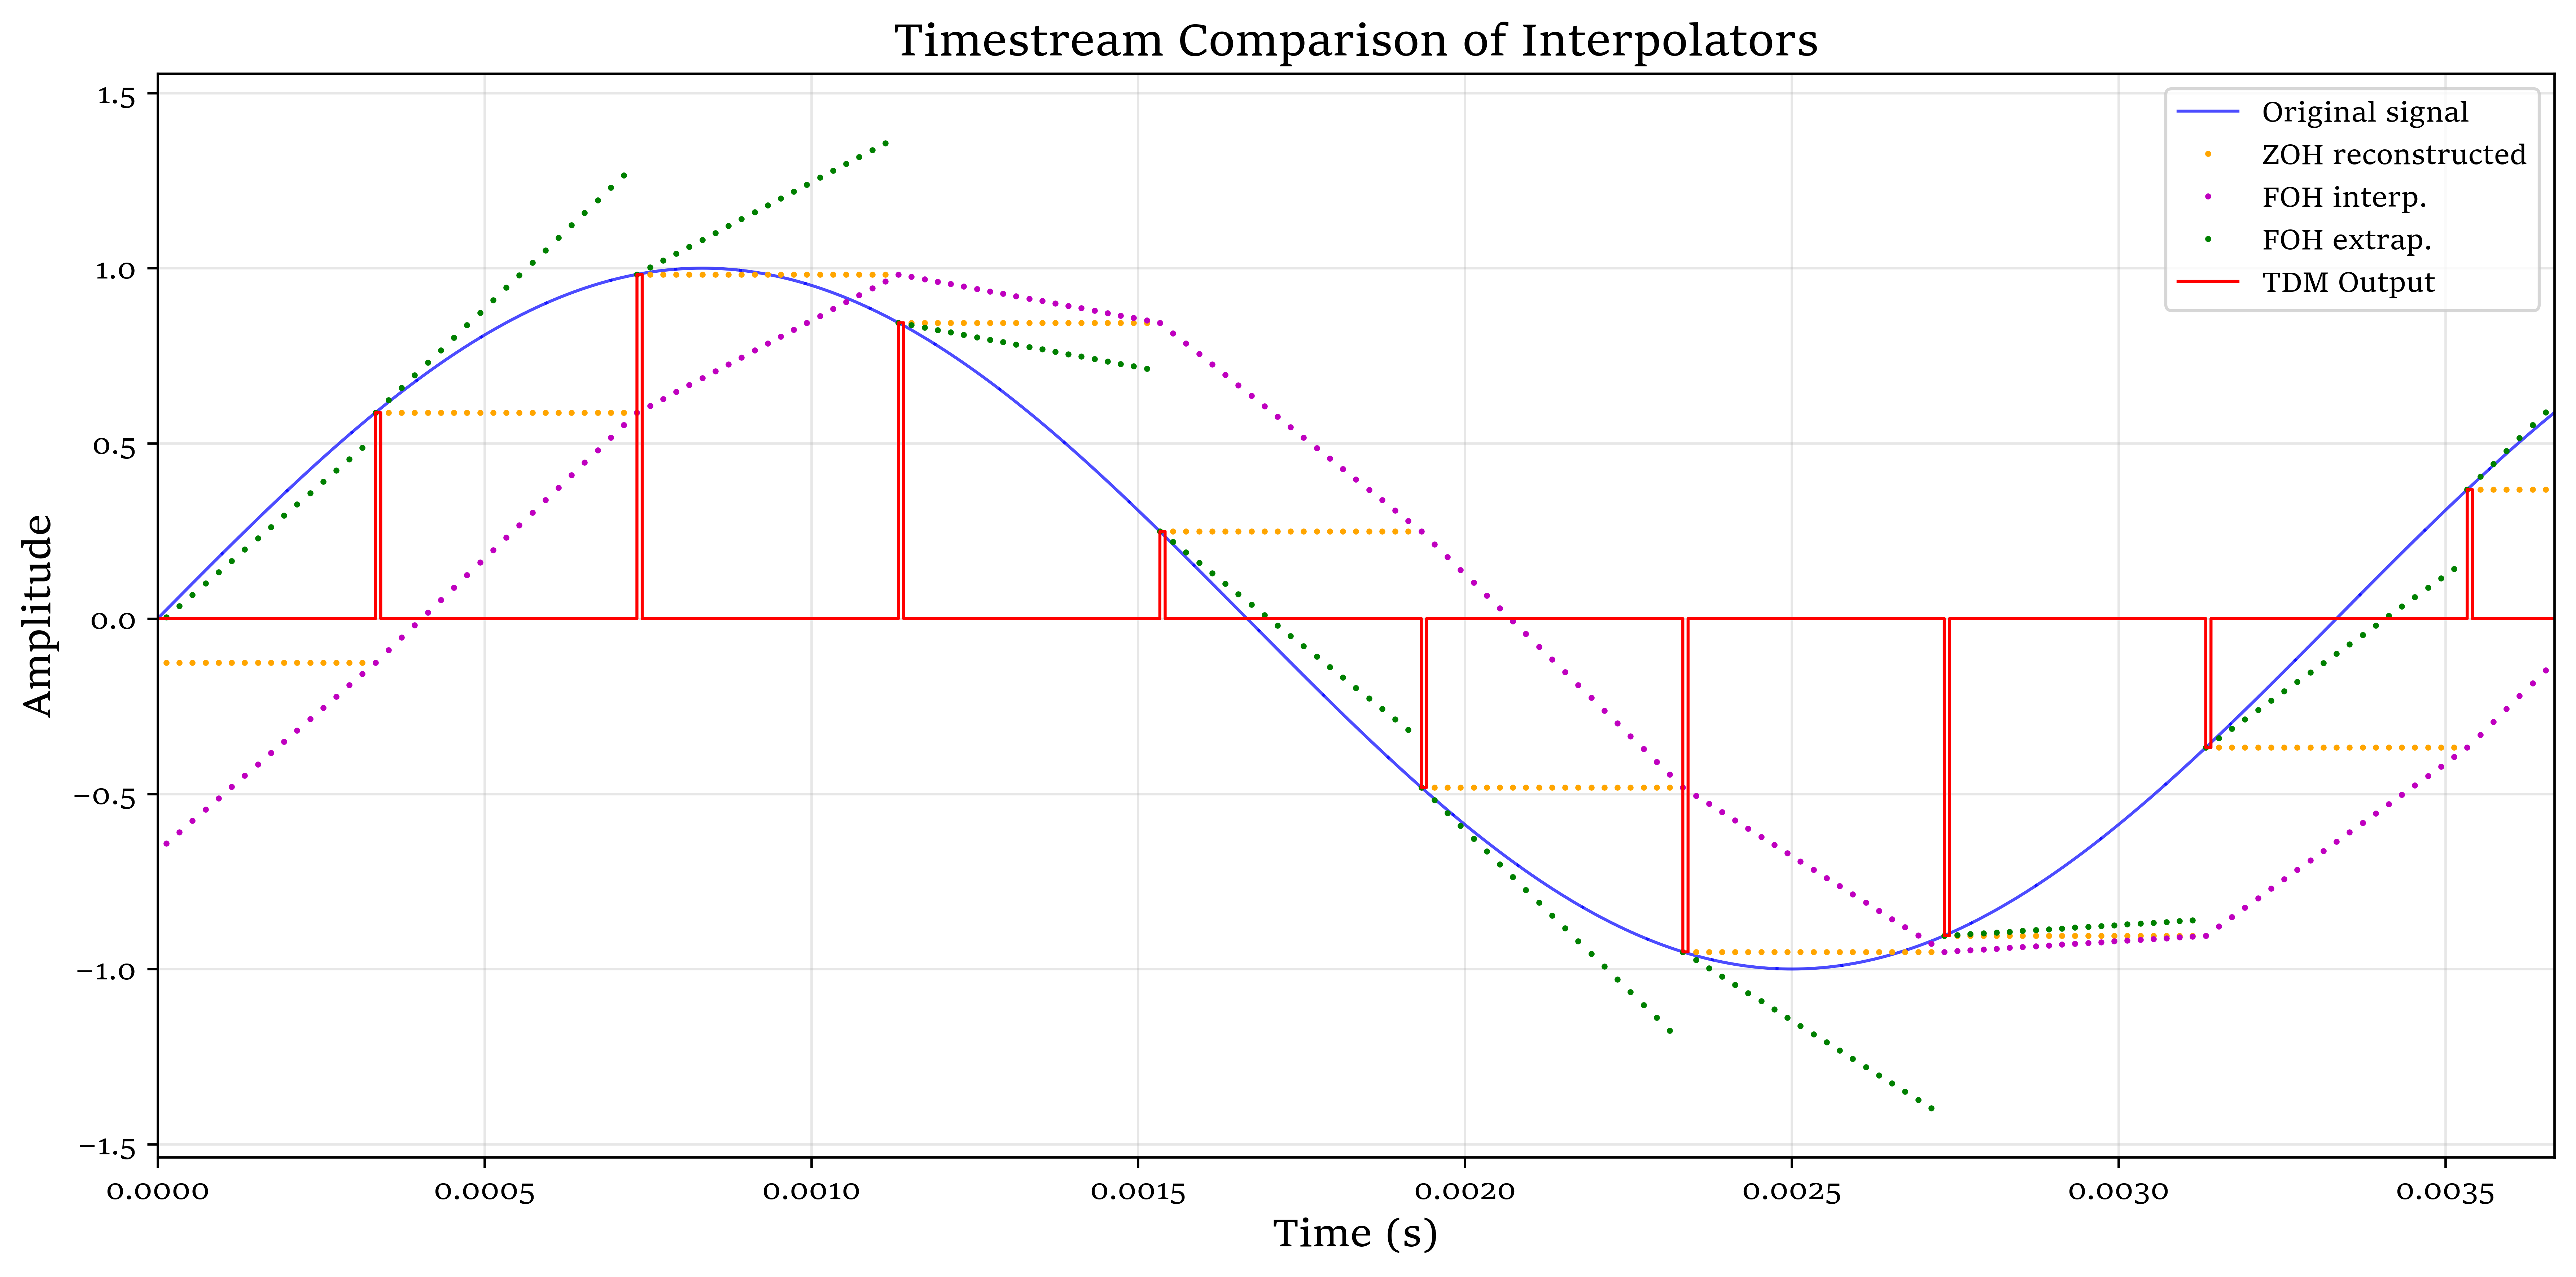

In [112]:


# Plot timestream comparison
fig_time, ax_time = plt.subplots(figsize=(12, 6))
ax_time.plot(t_stream, sine_input, 'b-', linewidth=1, label='Original signal', alpha=0.7)
#ax_time.plot(t_stream, sin_input_zeropad, 'k--', linewidth=2, label='Decimated signal', alpha=0.7)
ax_time.plot(t_stream[::2000], sine_zoh[::2000],'orange', marker='.', ms=2, linestyle='', label='ZOH reconstructed')
ax_time.plot(t_stream[::2000], sine_foh[::2000], 'm', marker='.', ms=2, linestyle='', label='FOH interp.')
ax_time.plot(t_stream[::2000], sine_fohex[::2000], 'g', marker='.', ms=2, linestyle='', label='FOH extrap.')
ax_time.plot(t_stream, sine_fir, 'r-', linewidth=1, label='TDM Output')
#ax_time.plot(t_stream, sine_cic, 'g-.', linewidth=1, label='CIC N=1', alpha=0.7)
#ax_time.plot(t_stream, sin_cic2, 'c-.', linewidth=1, label='CIC N=2', alpha=0.7)
ax_time.set_xlabel('Time (s)')
ax_time.set_ylabel('Amplitude')
ax_time.set_xlim([0, 1.1/300])
ax_time.set_title('Timestream Comparison of Interpolators')
ax_time.grid(True, alpha=0.3)
ax_time.legend()
plt.tight_layout()
plt.show()

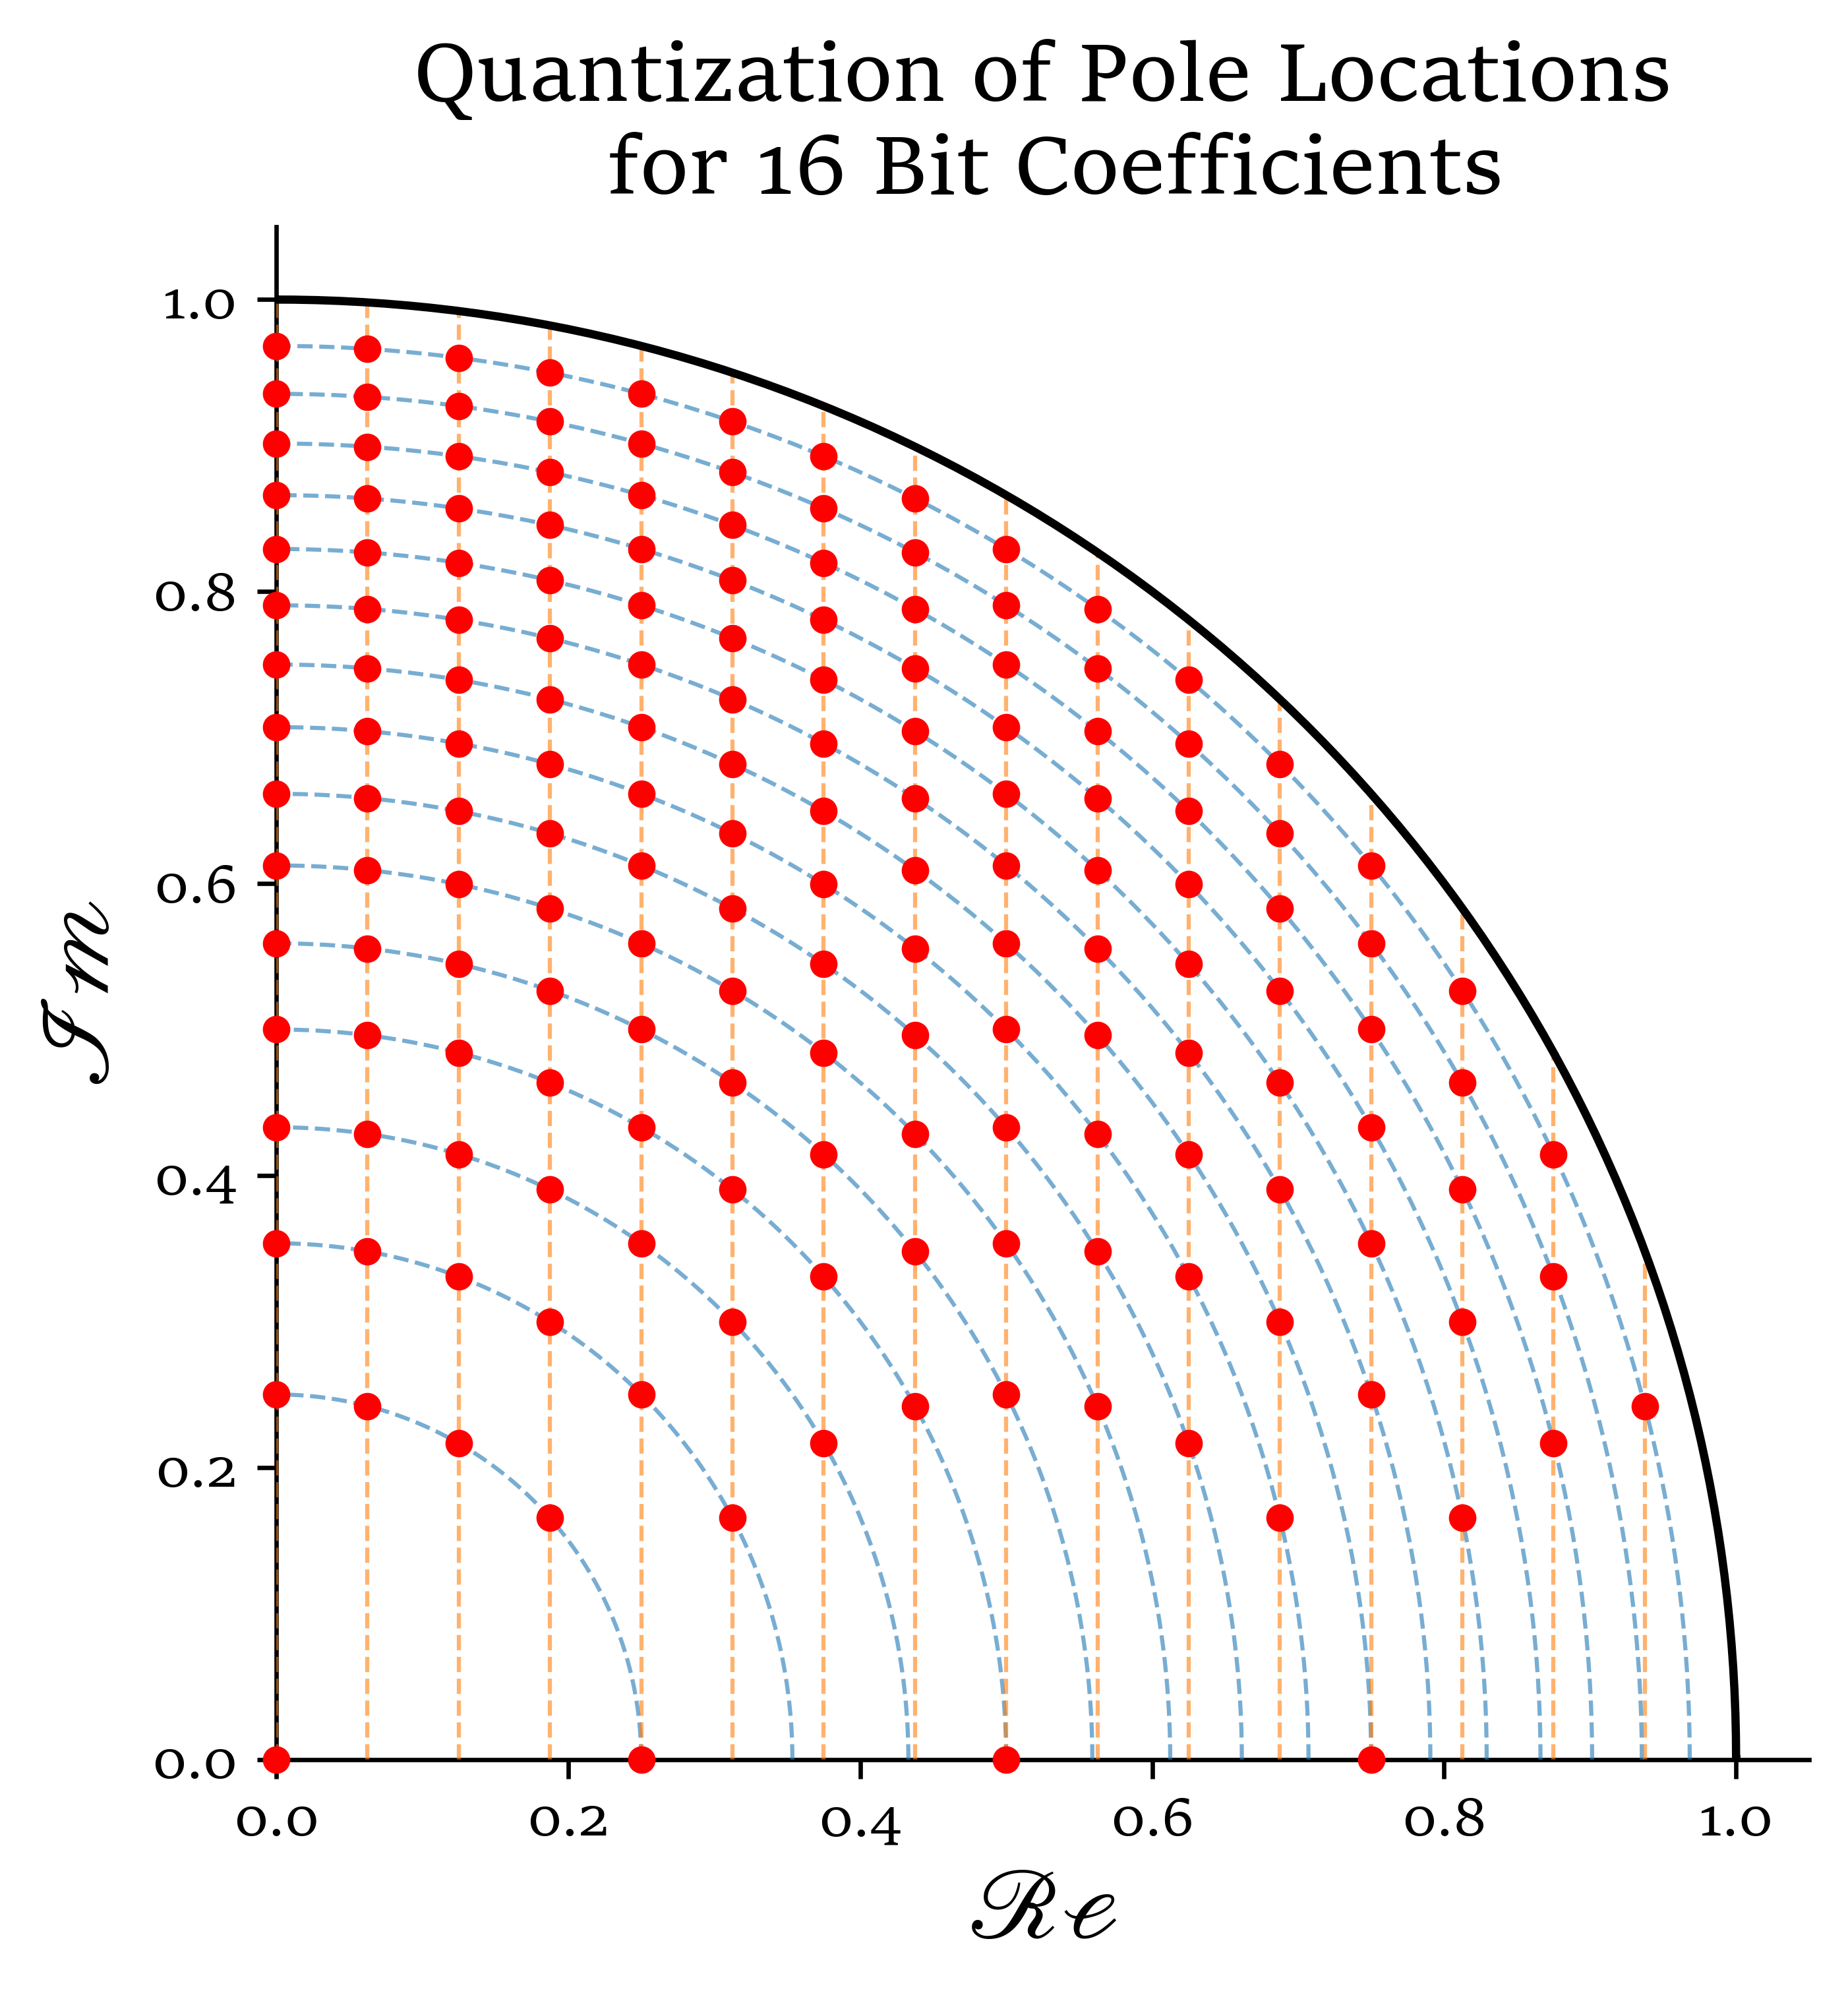

In [100]:
# parameters
n = 16  # change n as desired
radii_sq = np.linspace(0, 1, n, endpoint=False)
radii = np.sqrt(radii_sq)
x_lines = np.linspace(-1, 1, 2*n, endpoint=False)

theta = np.linspace(0, 2 * np.pi, 400)

fig, ax = plt.subplots(figsize=(5,5.5))

# plot concentric circles
for r in radii:
    ax.plot(r * np.cos(theta), r * np.sin(theta), color='C0', linestyle='--', linewidth=0.75, alpha=0.6)


# plot vertical line segments only inside unit circle
for x0 in x_lines:
    ymax = np.sqrt(max(0, 1 - x0**2))
    ax.vlines(x0, -ymax, ymax, color='C1', linestyle='--', linewidth=0.75, alpha=0.6)

ax.plot(np.cos(theta), np.sin(theta), color='k', linewidth=1.5)  # unit circle

ax.set_xlim(0, 1.05)
ax.set_ylim(0, 1.05)

# compute and plot intersections
ix, iy = [], []
for x0 in x_lines:
    for r in radii:
        val = r**2 - x0**2
        if val < 0:
            continue
        y = np.sqrt(max(0, val))
        if x0 >= 0 and y >= 0:
            ix.append(x0); iy.append(y)
        if y > 0:
            if x0 >= 0 and -y >= 0:
                ix.append(x0); iy.append(-y)

ax.plot(ix, iy, 'ro', markersize=4, zorder=10, clip_on=False)
for spine in ax.spines.values():
    spine.set_zorder(0)
ax.spines[['right', 'top']].set_visible(False)
ax.set_aspect('equal', 'box')

ax.set_xlabel(r'$\mathscr{Re}$',fontsize=18); ax.set_ylabel(r'$\mathscr{Im}$',fontsize=18)
ax.set_title(f'Quantization of Pole Locations\n for {n} Bit Coefficients')
plt.show()